In [1]:
!which python

/c/Users/junec/AppData/Local/Programs/Python/Python38/python


In [2]:
import struct 
struct.calcsize("P")*8

32

In [3]:
# !pip list

In [4]:
# !pip install openpyxl

In [5]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from matplotlib import rcParams
from operator import itemgetter
from typing import Callable, Dict, List, Set, Tuple

In [ ]:
from util import load_data_from_txt, calculate_derivative
from baseline import detect_breakpoints, detect_breakpoints_2, detect_breakpoints_3, detect_breakpoints_all
from plot import group_index, plot_4_metrics,plot_4_metrics_details

In [6]:
input_file="../data_input/Synthetic_Data.xlsx"
rate_sheet="Rate"
rate_vs_time = pd.DataFrame(pd.read_excel(input_file, sheet_name=rate_sheet))
rate_vs_time

,Time@end,Liquid rate (STB/D)
0,2019-01-07 18:59:30,-6742.395145
1,2019-01-11 13:13:00,-8513.514104
2,2019-01-12 00:21:30,0.000000
3,2019-01-12 10:11:30,-5548.484464
4,2019-01-13 08:43:00,-8951.244013
...,...,...
90,2019-07-06 01:47:35,0.107707
91,2019-07-06 01:50:05,0.105123
92,2019-07-06 01:54:35,-1909.311284
93,2019-07-30 18:52:05,-5453.279913


In [7]:
input_file="../data_input/Synthetic_Data.xlsx"
pressure_sheet="Pressure"
pressure_vs_time = pd.DataFrame(pd.read_excel(input_file, sheet_name=pressure_sheet))
pressure_vs_time

,Date,Pressure (psia)
0,2019-01-01 00:00:00,2000.000000
1,2019-01-01 00:00:22,2092.738568
2,2019-01-01 00:00:44,2125.952010
3,2019-01-01 00:01:05,2149.773050
4,2019-01-01 00:01:27,2168.851204
...,...,...
3514,2019-09-05 10:03:05,2327.338989
3515,2019-09-06 16:20:44,2322.764893
3516,2019-09-07 22:38:24,2318.352641
3517,2019-09-09 04:56:04,2314.092149


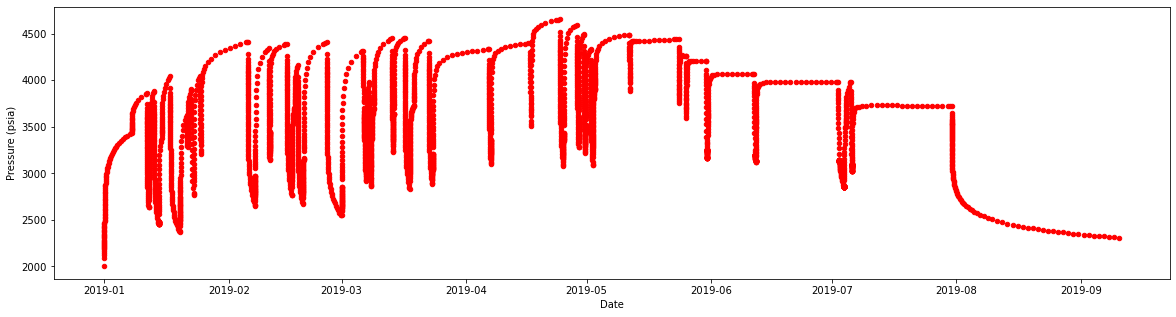

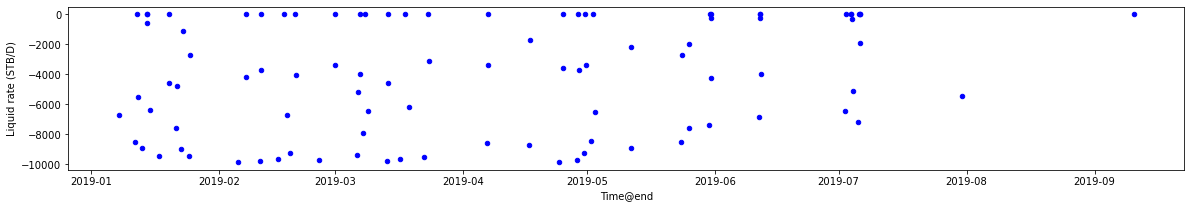

In [8]:
# scatter plot
pressure_vs_time.plot(kind='scatter',figsize=(20,5),x='Date',y='Pressure (psia)',color='red')
plt.show()
rate_vs_time.plot(kind='scatter',figsize=(20,3),x='Time@end',y='Liquid rate (STB/D)',color='blue')
plt.show()

In [9]:
def calculate_derivative(x_coordinate:List[float],y_coordinate:List[float])->List[float]:
    """
    calculate forward derivative, the last point use the backforward derivative
    Args:
            x_coordinate: the value of x coordinate
            y_coordinate: the value of y coordinate

        Returns:
            derivative.
    """
    if len(x_coordinate)!=len(y_coordinate):
        print(f"the length of x_coordinate '{len(x_coordinate)}' is not equal to the length of y_coordinate '{len(y_coordinate)}'")
        return None
    
    length=len(y_coordinate)
    
    derivative=[0.0]*length
    for i in range(length-1):
        derivative[i]=(y_coordinate[i+1]-y_coordinate[i])/(x_coordinate[i+1]-x_coordinate[i]).total_seconds()

    #calculate for the last point
    derivative[-1]=(y_coordinate[length-1]-y_coordinate[length-2])/(x_coordinate[length-1]-x_coordinate[length-2]).total_seconds()
    return derivative

In [10]:
#calculate first & second derivative
x_coordinate=pressure_vs_time["Date"]
y_coordinate=pressure_vs_time["Pressure (psia)"]
first_order_derivative=calculate_derivative(x_coordinate,y_coordinate)

x_coordinate=pressure_vs_time["Date"]
y_coordinate=first_order_derivative
second_order_derivative=calculate_derivative(x_coordinate,y_coordinate)

#add first and second derivative to pressure_vs_time dataframe
pressure_vs_time["first_order_derivative"]=first_order_derivative
pressure_vs_time["second_order_derivative"]=second_order_derivative
pd.set_option('display.max_rows', pressure_vs_time.shape[0]+1)
display(pressure_vs_time)

,Date,Pressure (psia),first_order_derivative,second_order_derivative
0,2019-01-01 00:00:00,2000.000000,4.215389e+00,-1.229858e-01
1,2019-01-01 00:00:22,2092.738568,1.509702e+00,-1.706212e-02
2,2019-01-01 00:00:44,2125.952010,1.134335e+00,-1.272126e-02
3,2019-01-01 00:01:05,2149.773050,8.671888e-01,-6.130525e-03
4,2019-01-01 00:01:27,2168.851204,7.323172e-01,-4.272380e-03
5,2019-01-01 00:01:49,2184.962183,6.383249e-01,-3.181277e-03
6,2019-01-01 00:02:11,2199.005331,5.683368e-01,-1.365905e-03
7,2019-01-01 00:02:33,2211.508740,5.382869e-01,-3.254730e-03
8,2019-01-01 00:02:54,2222.812765,4.699376e-01,-1.586763e-03
9,2019-01-01 00:03:16,2233.151391,4.350288e-01,-1.501335e-03


In [25]:
def detect_breakpoints(first_order_derivative,second_order_derivative):
    breakpoints=[]
    std=statistics.stdev(first_order_derivative)
    print(std)
    for i in range(len(first_order_derivative)-1):
        if (first_order_derivative[i]>0)^(first_order_derivative[i+1]>0) and abs(first_order_derivative[i+1]-first_order_derivative[i])>std :
#         if (first_order_derivative[i]>0)^(first_order_derivative[i+1]>0):
            breakpoints.append(i+1)
        elif abs(first_order_derivative[i+1]-first_order_derivative[i])>3.3:
            breakpoints.append(i+1)
        elif abs(second_order_derivative[i+1]-second_order_derivative[i])>0.1:
            breakpoints.append(i+1)
#         elif abs(second_order_derivative[i])>0.1:
#             breakpoints.append(i)
    return breakpoints


breakpoints=detect_breakpoints(first_order_derivative,second_order_derivative)
print(len(breakpoints))
print(breakpoints)

0.7023661603894276
106
[1, 107, 108, 164, 243, 244, 327, 328, 375, 376, 446, 479, 480, 504, 523, 546, 547, 568, 569, 592, 593, 611, 612, 644, 645, 713, 745, 771, 772, 820, 860, 887, 888, 953, 954, 1036, 1037, 1101, 1151, 1179, 1180, 1254, 1291, 1319, 1396, 1456, 1457, 1513, 1598, 1599, 1648, 1693, 1719, 1720, 1784, 1875, 1876, 1938, 1982, 2017, 2018, 2073, 2106, 2137, 2156, 2157, 2185, 2186, 2247, 2289, 2290, 2315, 2316, 2369, 2409, 2433, 2434, 2487, 2528, 2552, 2553, 2610, 2698, 2713, 2746, 2764, 2789, 2807, 2835, 2836, 2915, 2916, 2965, 2966, 3043, 3044, 3101, 3239, 3240, 3284, 3285, 3354, 3355, 3367, 3368, 3411]


In [31]:
def detect_breakpoints_2(first_order_derivative):
    breakpoints=[]
    std=statistics.stdev(first_order_derivative)
    print(std)
    compare_point=first_order_derivative[0]
    for i in range(len(first_order_derivative)-1):
        if (compare_point>0)^(first_order_derivative[i+1]>0):
            if abs(first_order_derivative[i+1]-first_order_derivative[i])>std :
                breakpoints.append(i+1)
                compare_point=first_order_derivative[i+1]
#             else:
#                 compare_point=first_order_derivative[i]
        else:
            compare_point=first_order_derivative[i+1]
            
 
    return breakpoints


breakpoints=detect_breakpoints_2(first_order_derivative)
print(len(breakpoints))
print(breakpoints)

0.7023661603894276
59
[107, 164, 243, 328, 375, 446, 504, 523, 546, 568, 592, 611, 644, 713, 771, 820, 887, 953, 1036, 1101, 1179, 1254, 1319, 1396, 1456, 1513, 1598, 1648, 1719, 1784, 1875, 1938, 2017, 2073, 2137, 2156, 2185, 2247, 2315, 2369, 2433, 2487, 2552, 2610, 2698, 2713, 2746, 2764, 2789, 2807, 2835, 2916, 2965, 3044, 3101, 3240, 3284, 3355, 3411]


In [36]:
def detect_breakpoints_3(first_order_derivative,second_order_derivative):
    breakpoints=[]
    std_1=statistics.stdev(first_order_derivative)
    std_2=statistics.stdev(second_order_derivative)
    print(std_1,std_2)
    compare_point=first_order_derivative[0]
    for i in range(len(first_order_derivative)-1):
        if (compare_point>0)^(first_order_derivative[i+1]>0):
            if (abs(second_order_derivative[i+1])>2.4*std_2) and (abs(first_order_derivative[i+1])>2.4*std_1) :
                breakpoints.append(i+1)
                compare_point=first_order_derivative[i+1]
        else:
            compare_point=first_order_derivative[i+1]
            
 
    return breakpoints


breakpoints=detect_breakpoints_3(first_order_derivative,second_order_derivative)
print(len(breakpoints))
# print(breakpoints)

0.7023661603894276 0.02104760250856082
57


In [13]:
import statistics
def detect_breakpoints_all(first_order_derivative):
    breakpoints=[]
    std=statistics.stdev(first_order_derivative)
    for i in range(len(first_order_derivative)):
        if first_order_derivative[i]>2.5*std:
            breakpoints.append(i+1)
    return breakpoints


breakpoints_all=detect_breakpoints_all(first_order_derivative)
print(len(breakpoints_all))
print(breakpoints_all)

48
[1, 165, 221, 329, 351, 447, 481, 524, 569, 570, 612, 714, 746, 821, 861, 954, 1102, 1152, 1255, 1292, 1397, 1435, 1514, 1572, 1649, 1694, 1785, 1849, 1939, 1983, 2074, 2107, 2157, 2158, 2248, 2290, 2370, 2410, 2488, 2529, 2611, 2714, 2765, 2808, 2917, 3045, 3241, 3369]


In [12]:
def group_index(data, bin_start, bin_end, bin_step):
    x = np.array(data)
    bin_edges = np.arange(bin_start, bin_end + bin_step, bin_step)
    bin_number = bin_edges.size - 1
    cond = np.zeros((x.size, bin_number), dtype=bool)
    for i in range(bin_number):
        cond[:, i] = np.logical_and(bin_edges[i] < x,
                                    x < bin_edges[i+1])
    return [list(x[cond[:, i]]) for i in range(bin_number)]

# data=breakpoints 
# bin_start=0
# bin_end=len(pressure_vs_time["Date"])
# bin_step=100
# group_index(breakpoints, 0, len(pressure_vs_time["Date"]), N)

In [26]:
# pressure_vs_time.plot(kind='scatter',figsize=(20,5),x='Date',y='Pressure (psia)',color='red')

# for xc_index in breakpoints:
#     plt.axvline(x=pressure_vs_time["Date"][xc_index])
# plt.show()

# rate_vs_time.plot(kind='scatter',figsize=(20,3),x='Time@end',y='Liquid rate (STB/D)',color='blue')
# for xc_index in breakpoints:
#     plt.axvline(x=pressure_vs_time["Date"][xc_index])
# plt.show()


[[107, 164, 243], [328, 375, 446, 546, 568, 592], [611, 644, 713, 771, 820, 887], [953, 1036, 1101, 1179], [1254, 1319, 1396, 1456], [1513, 1598, 1648, 1719, 1784], [1875, 1938, 2017, 2073], [2137, 2156, 2185, 2247, 2315, 2369], [2433, 2487, 2552, 2610, 2698], [2713, 2746, 2764, 2789, 2807, 2835, 2916, 2965], [3044, 3101, 3240, 3284], [3368, 3411]]
12
breakpoints: 57


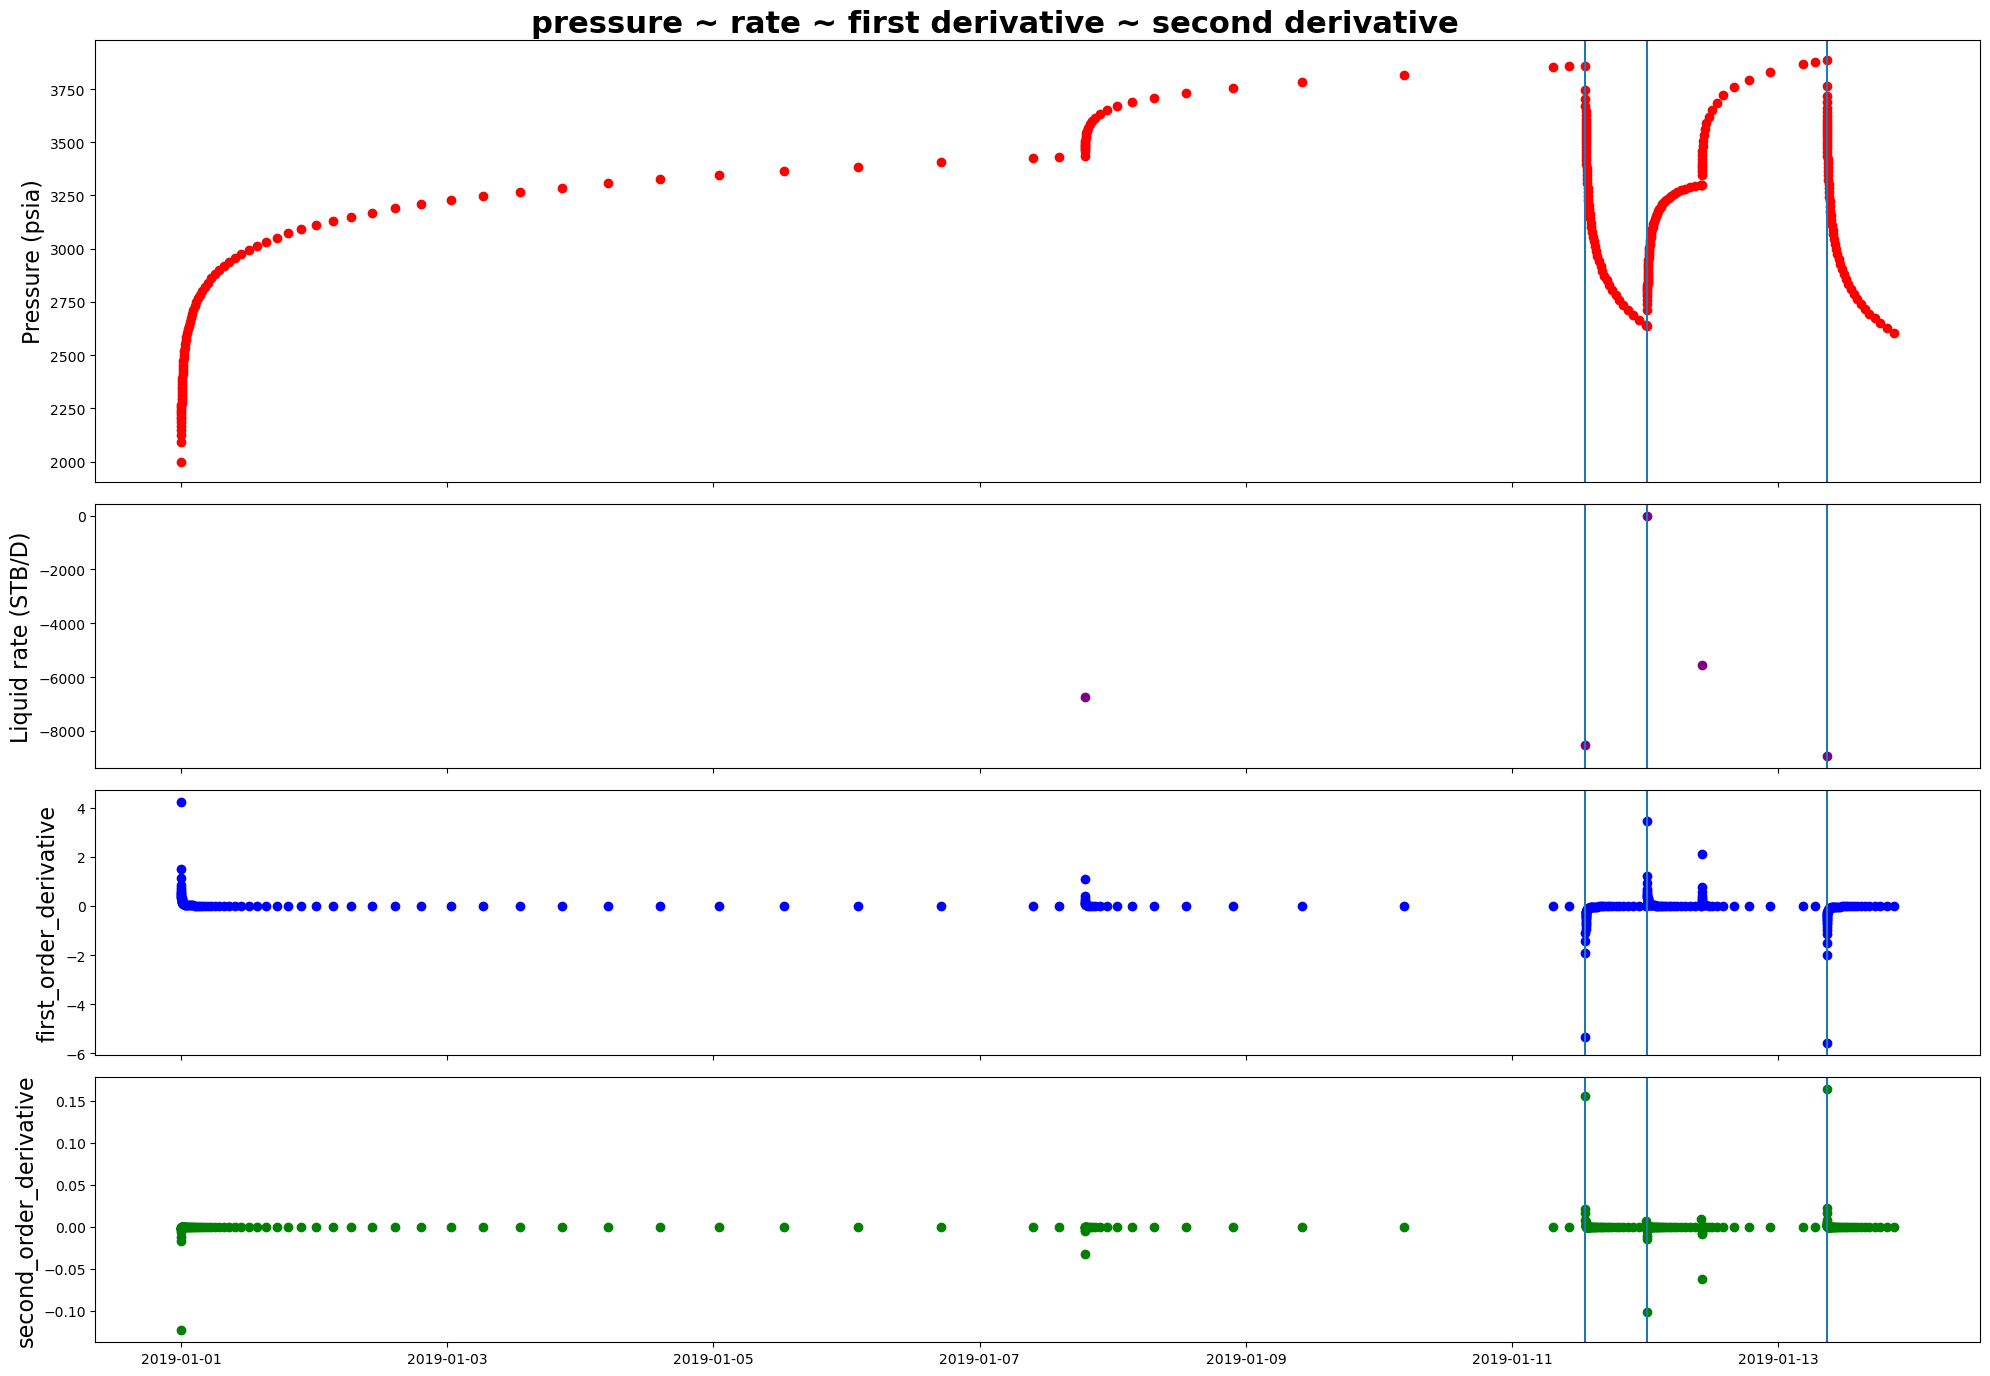

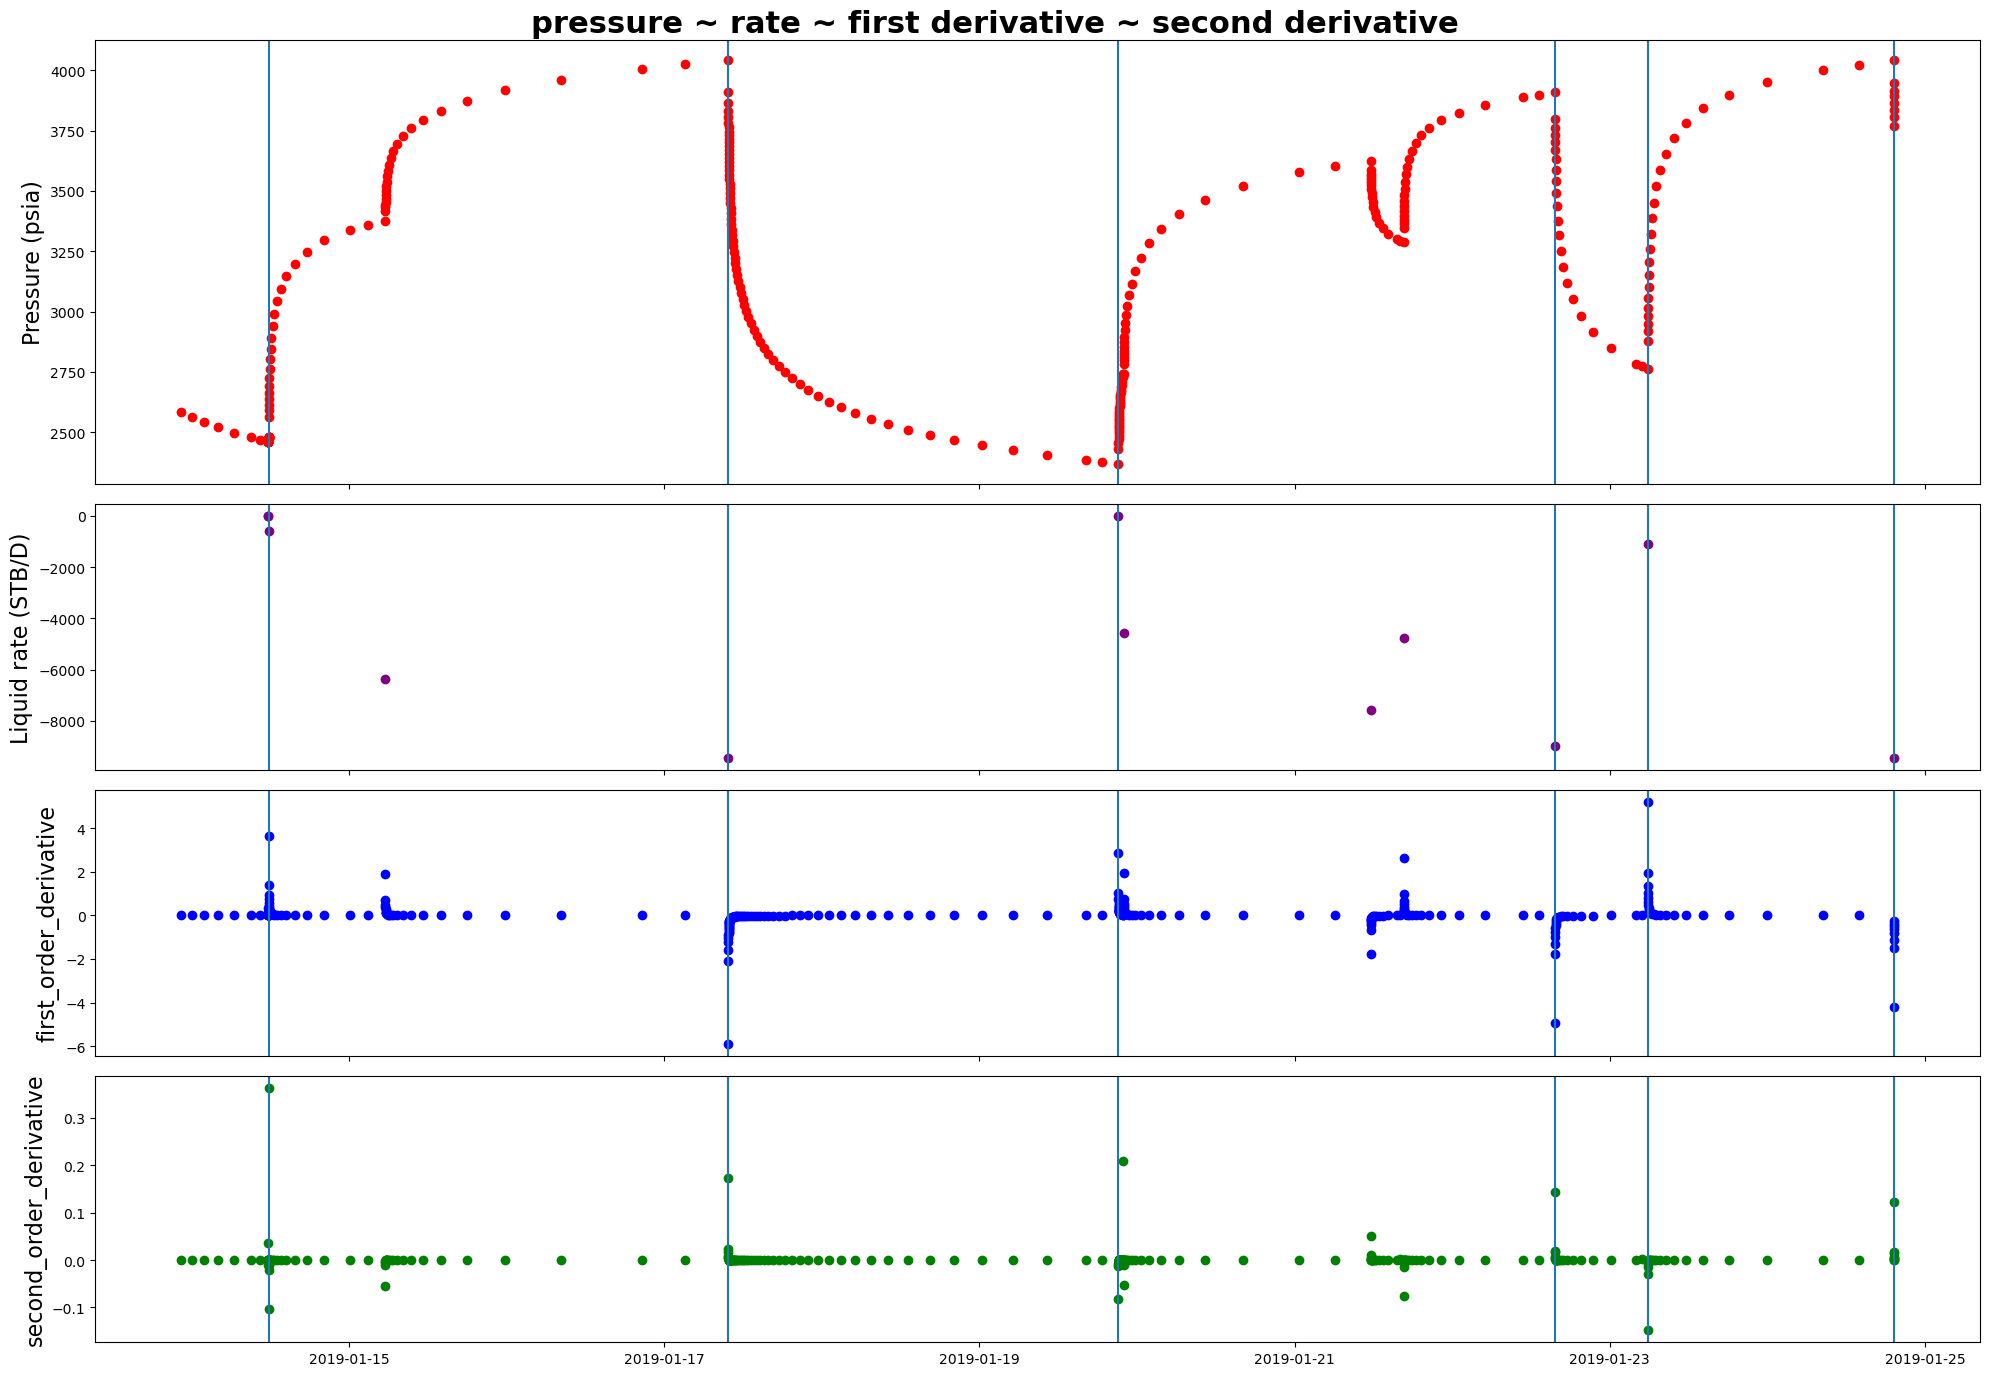

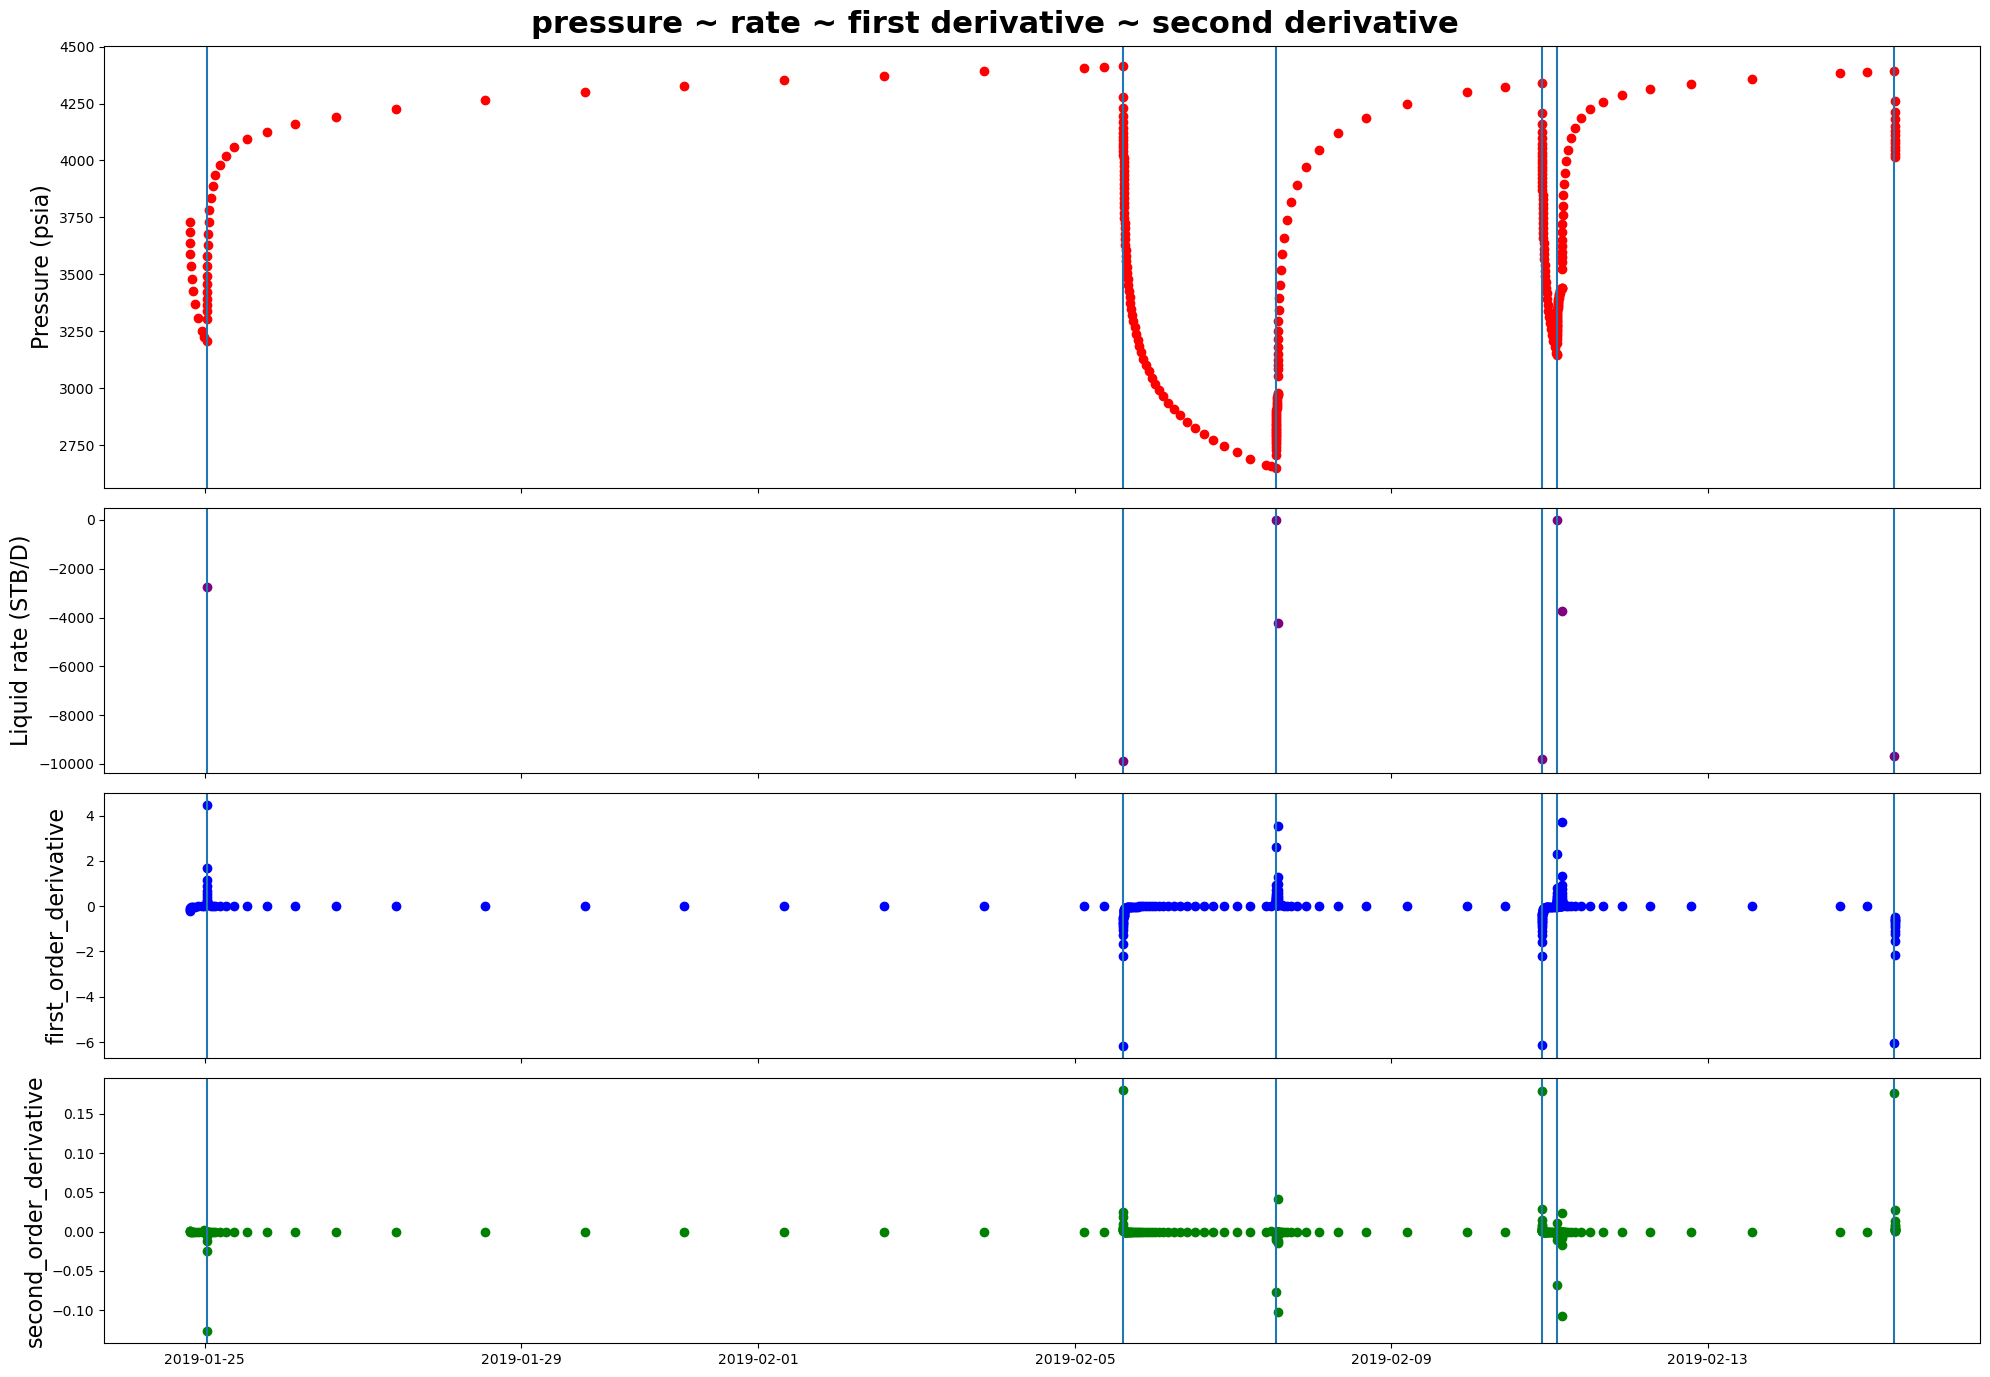

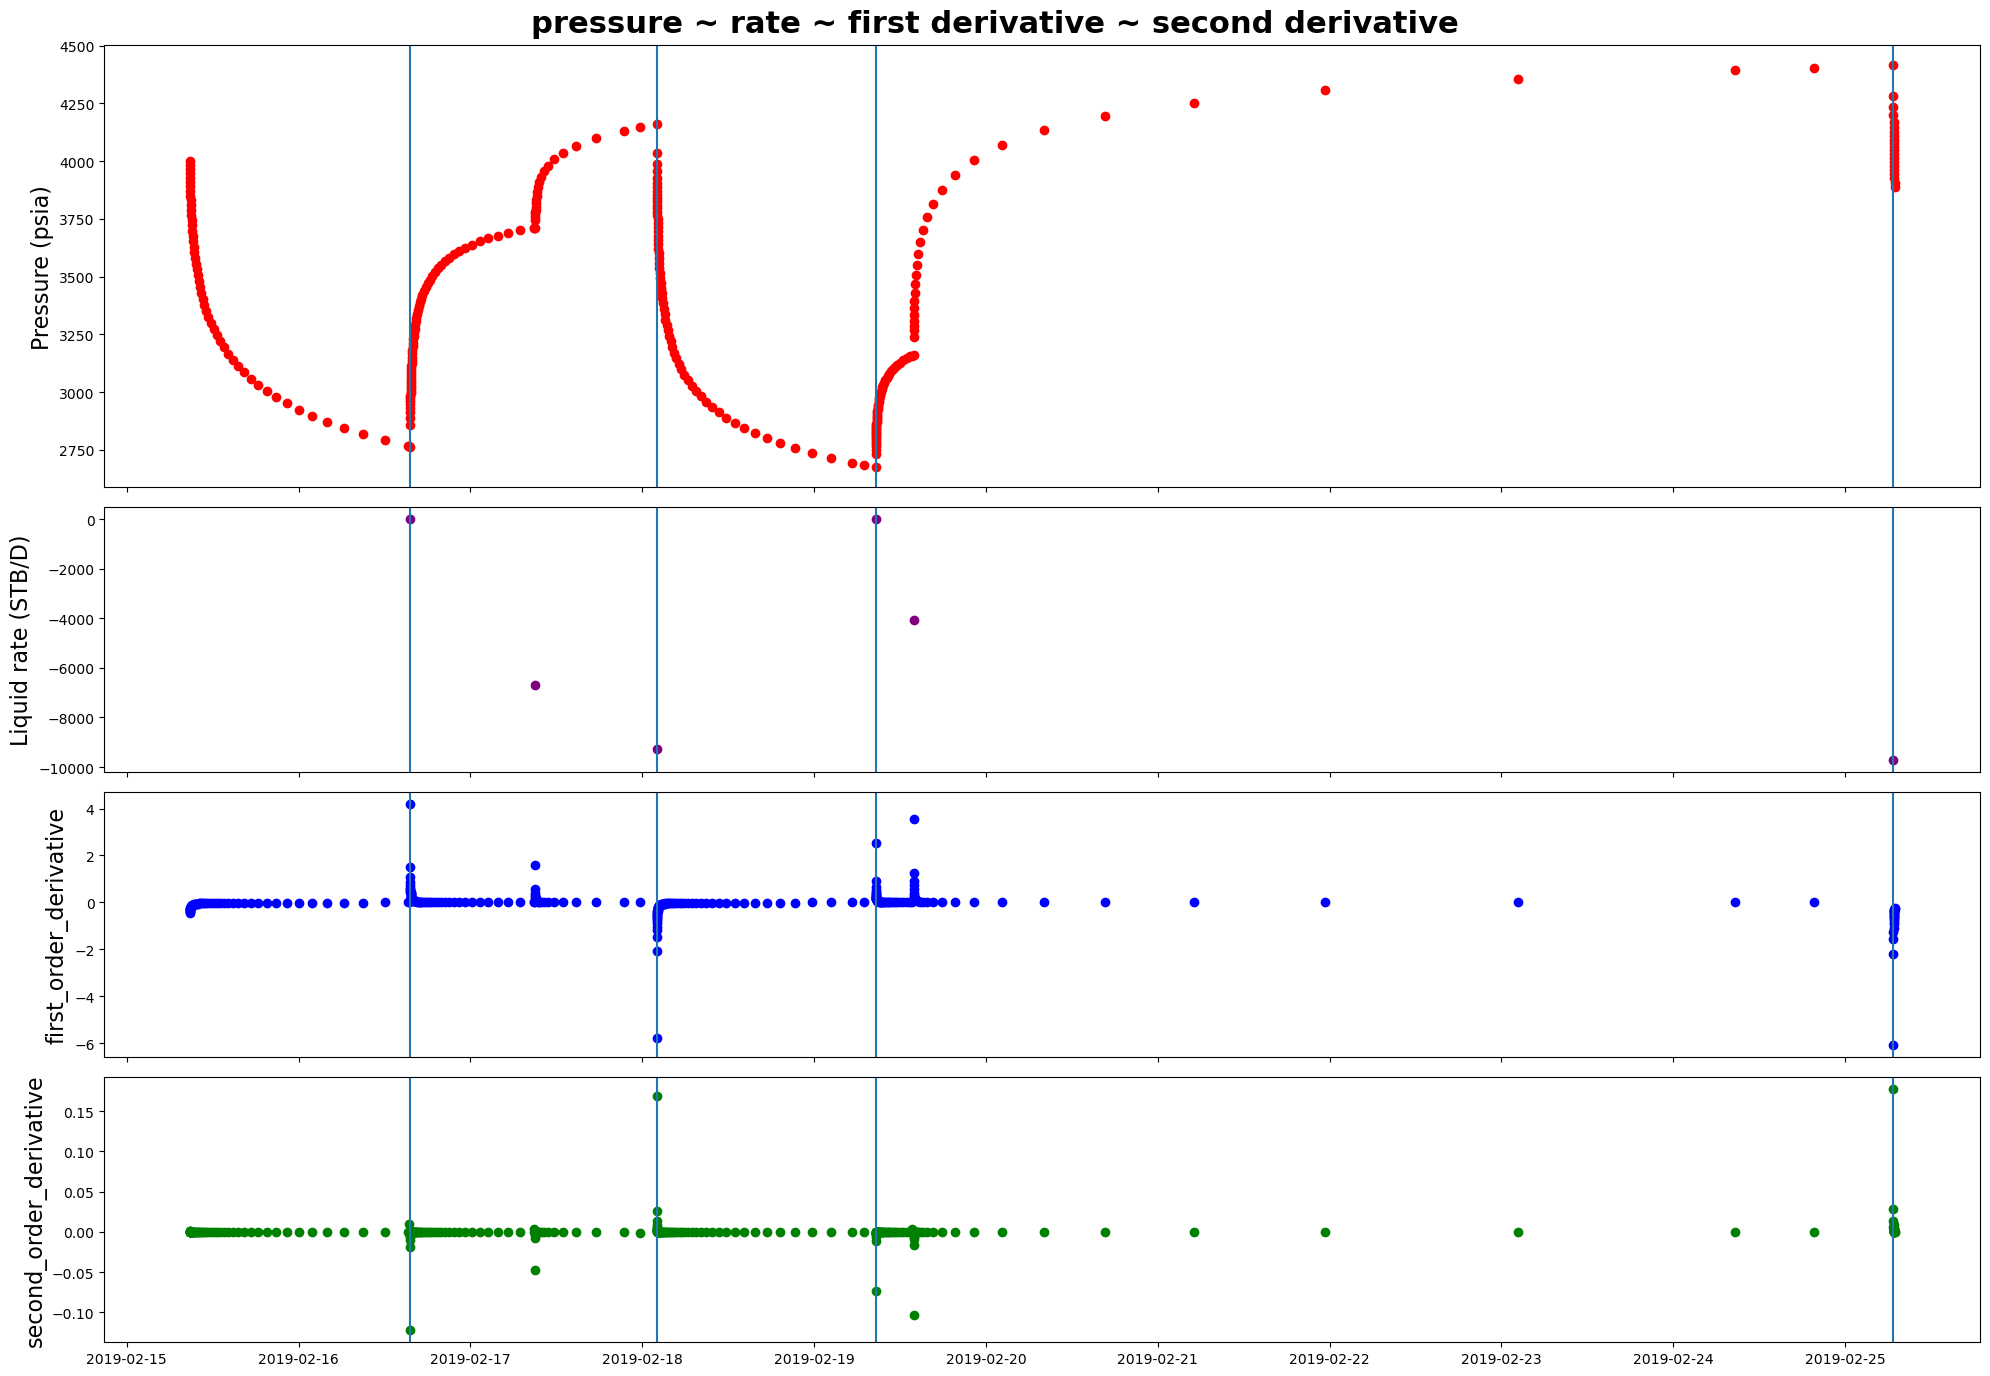

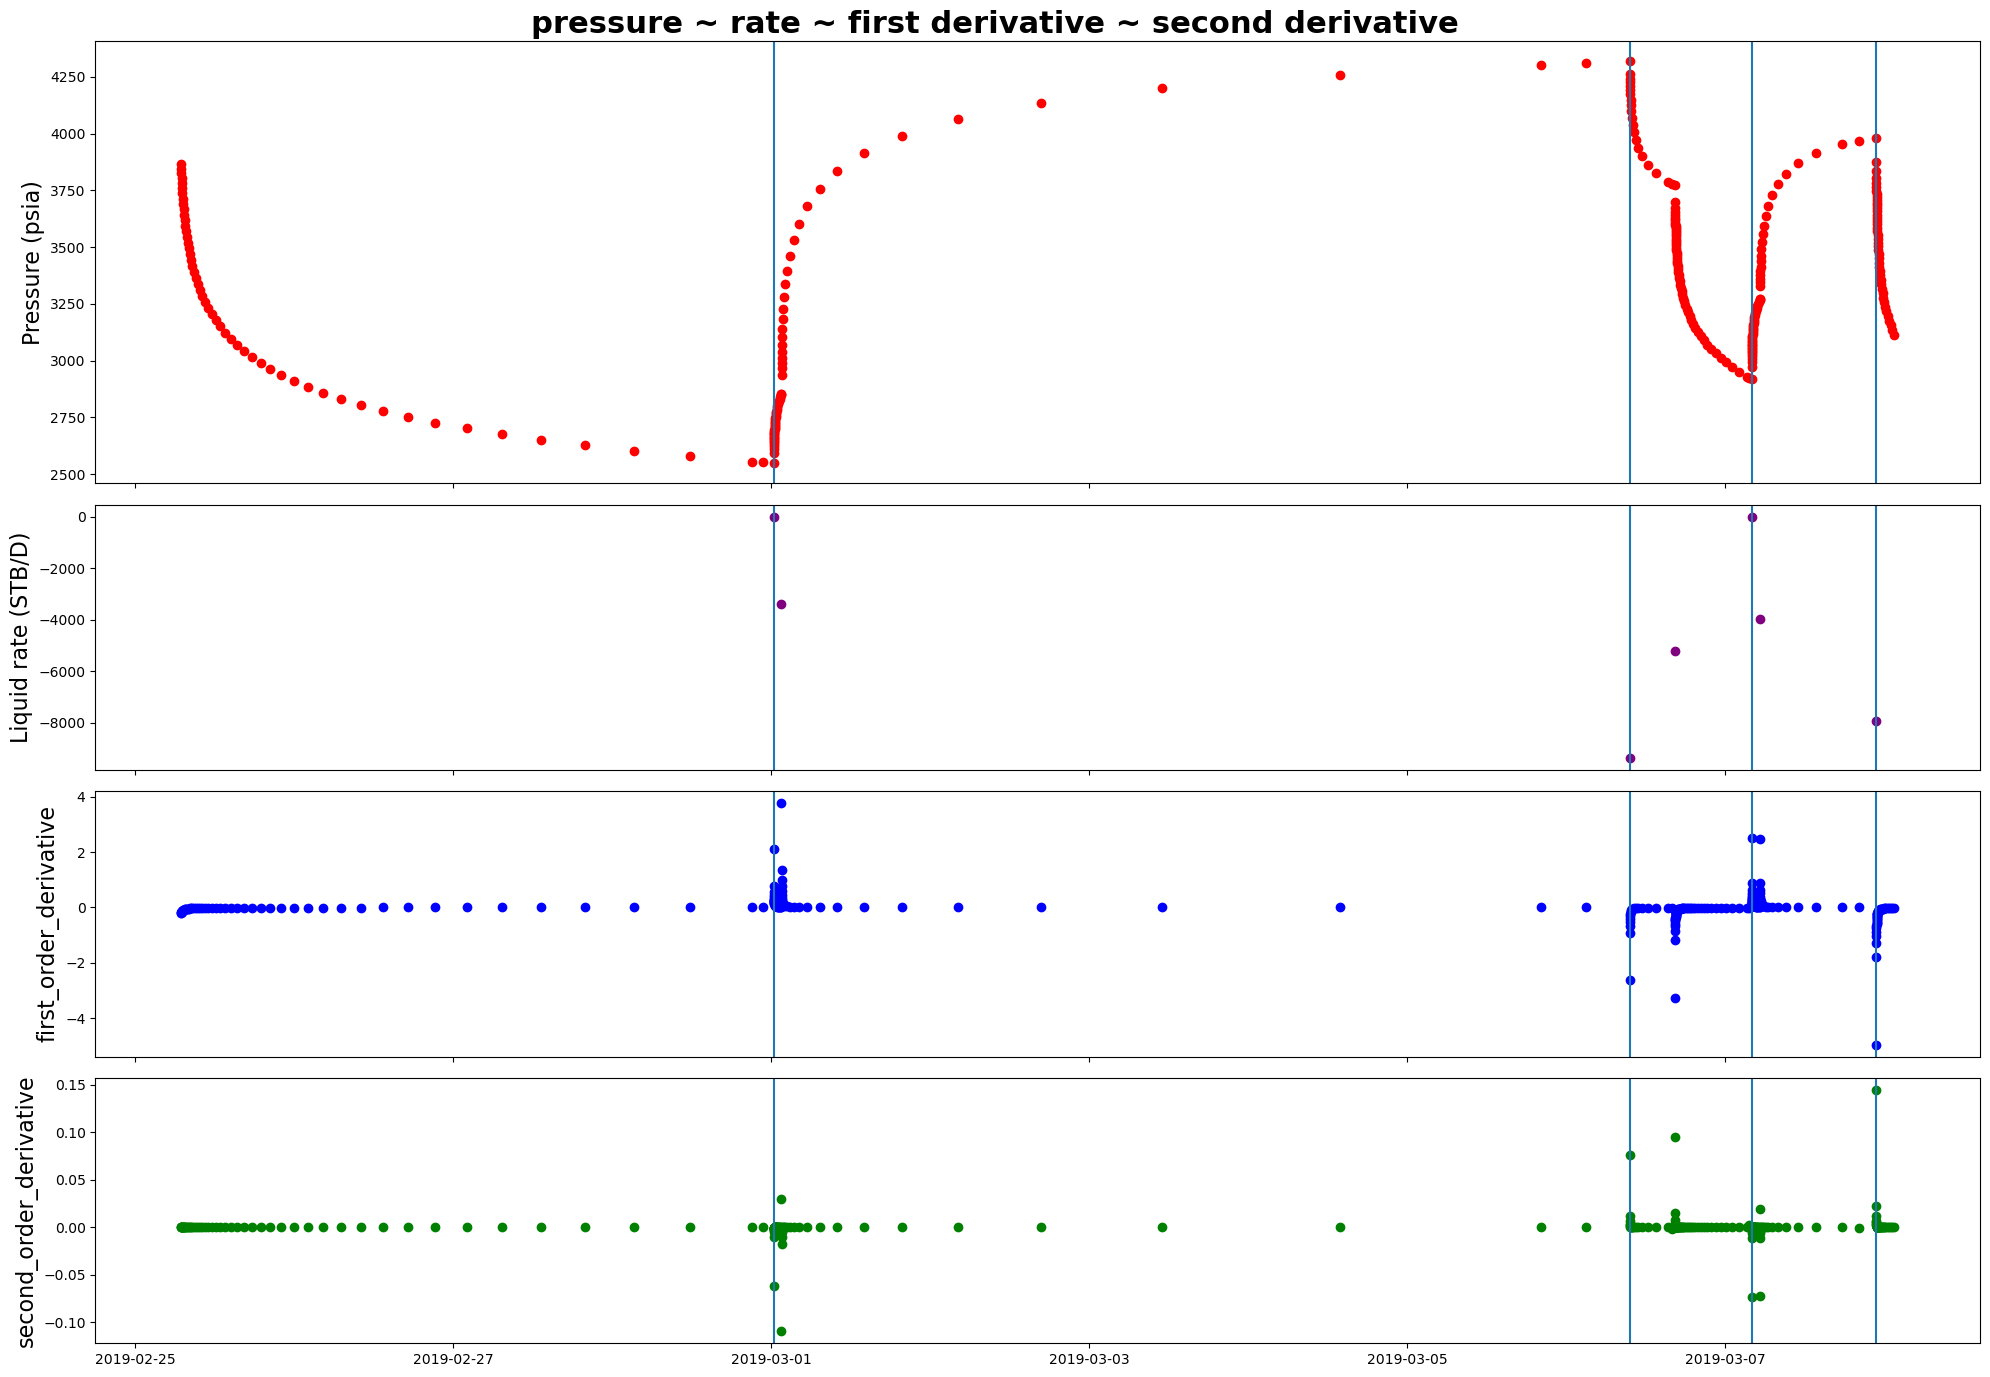

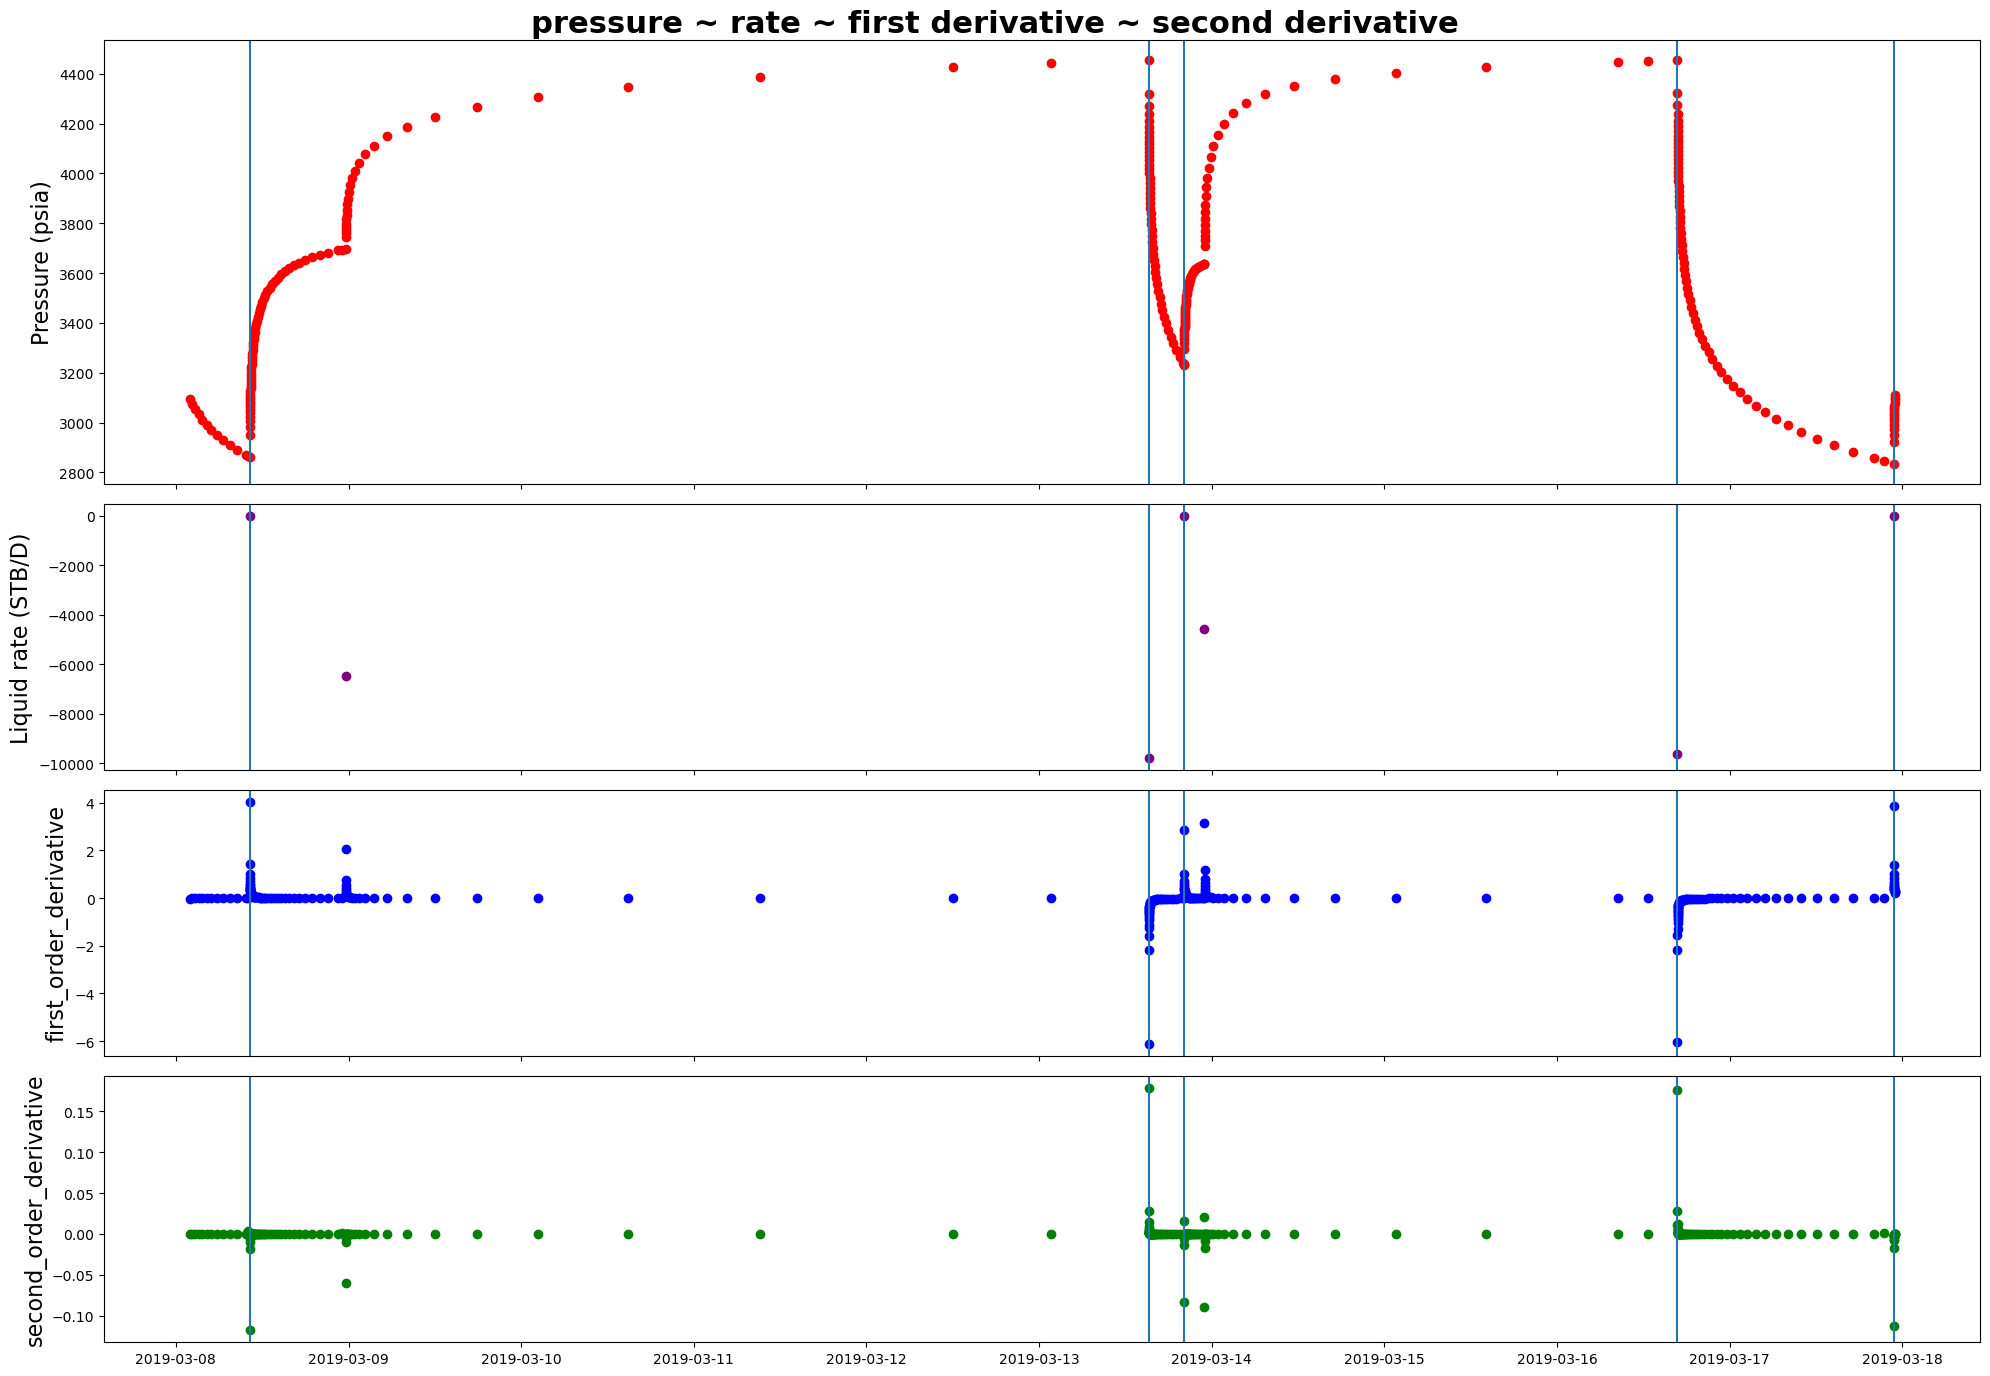

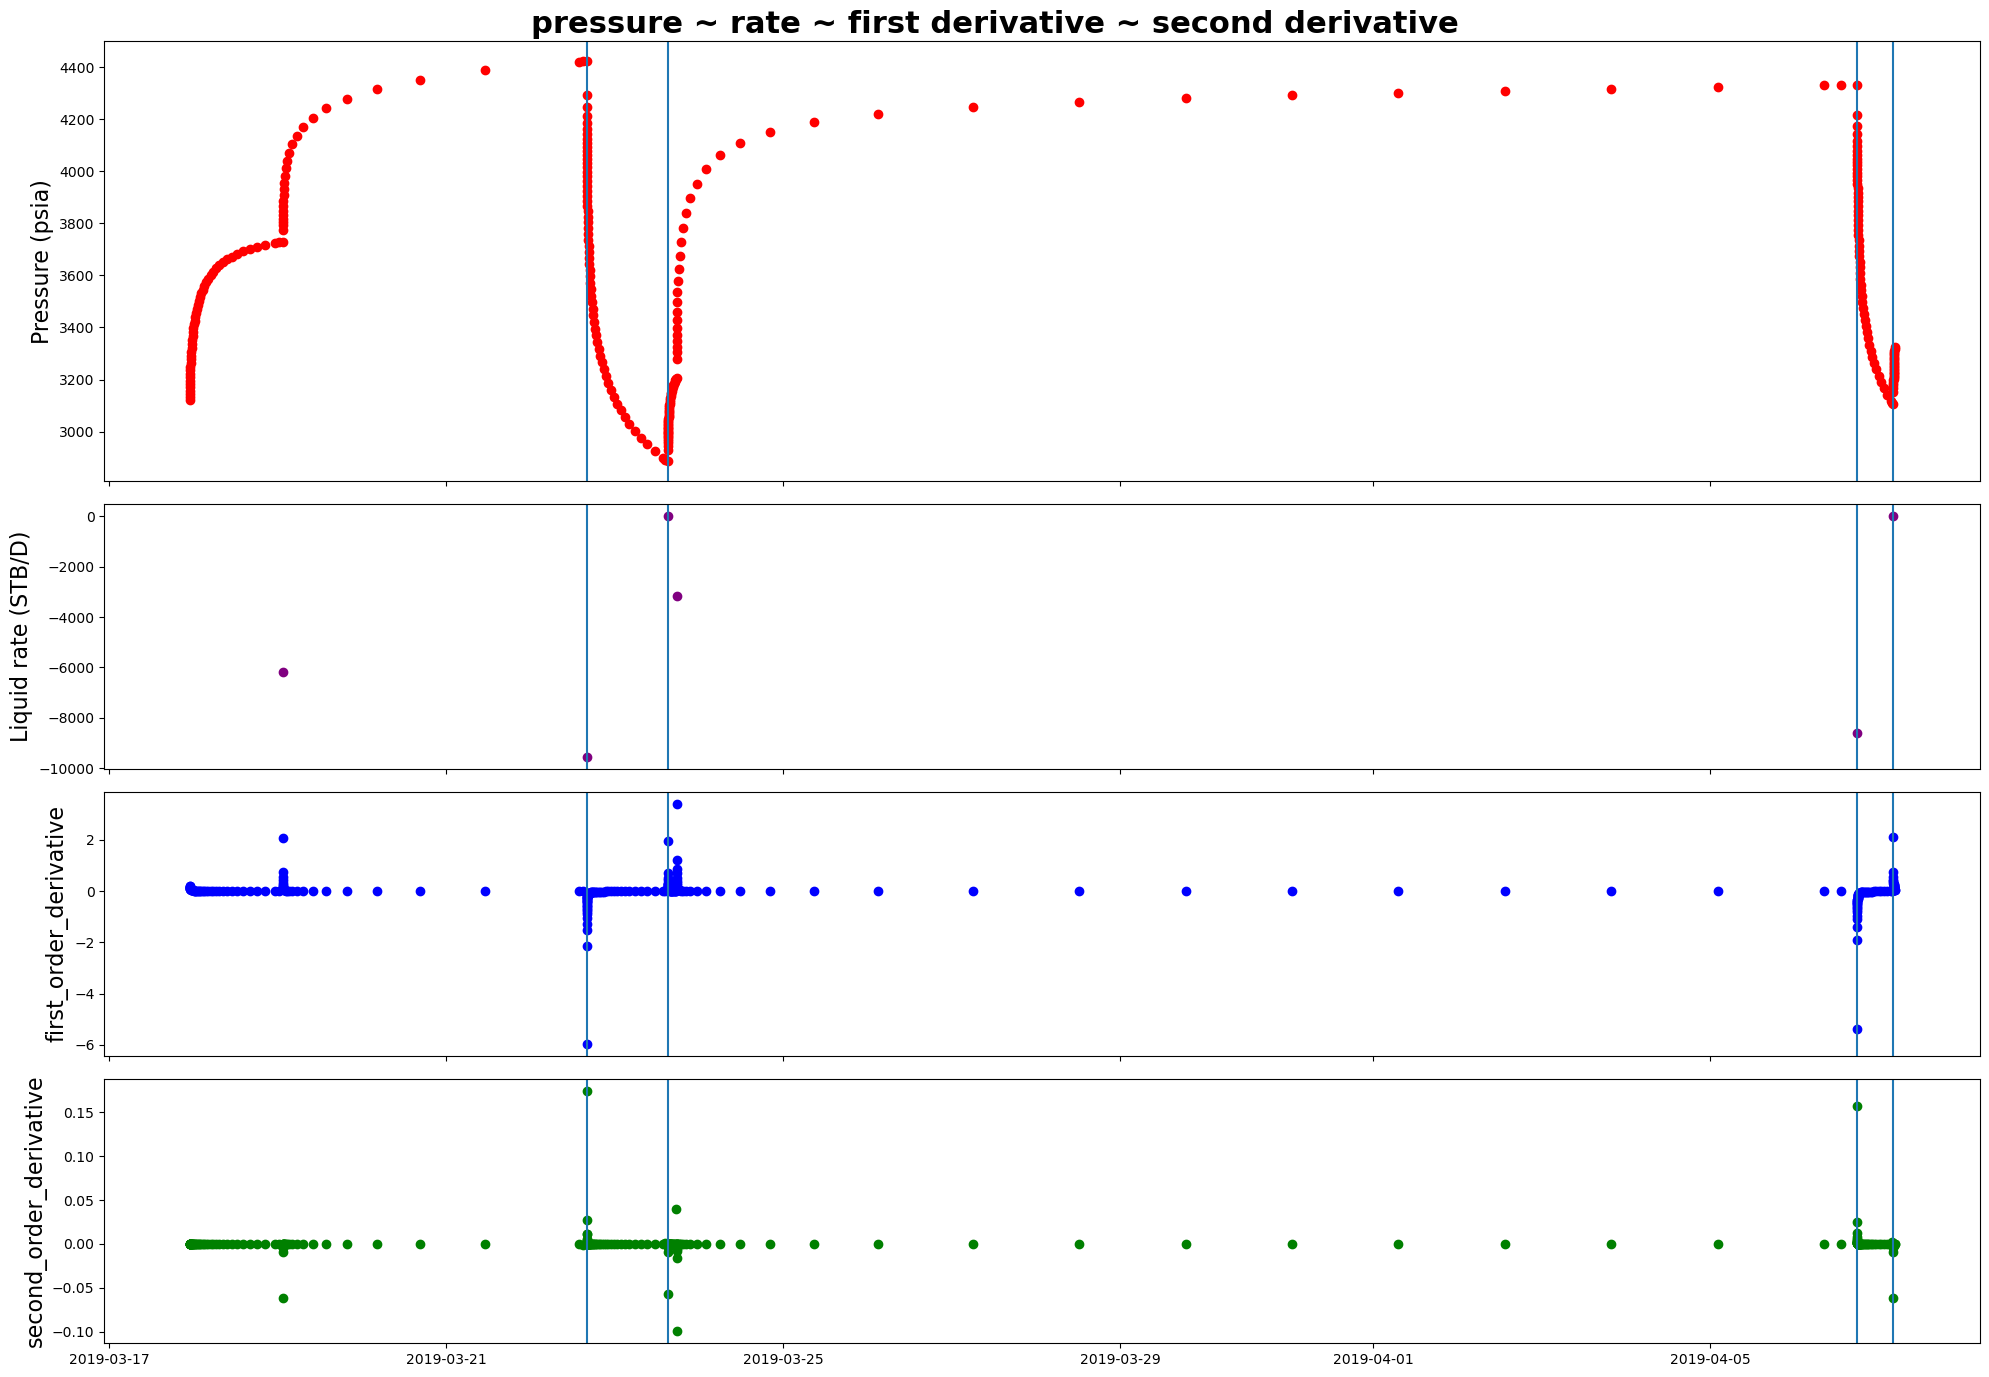

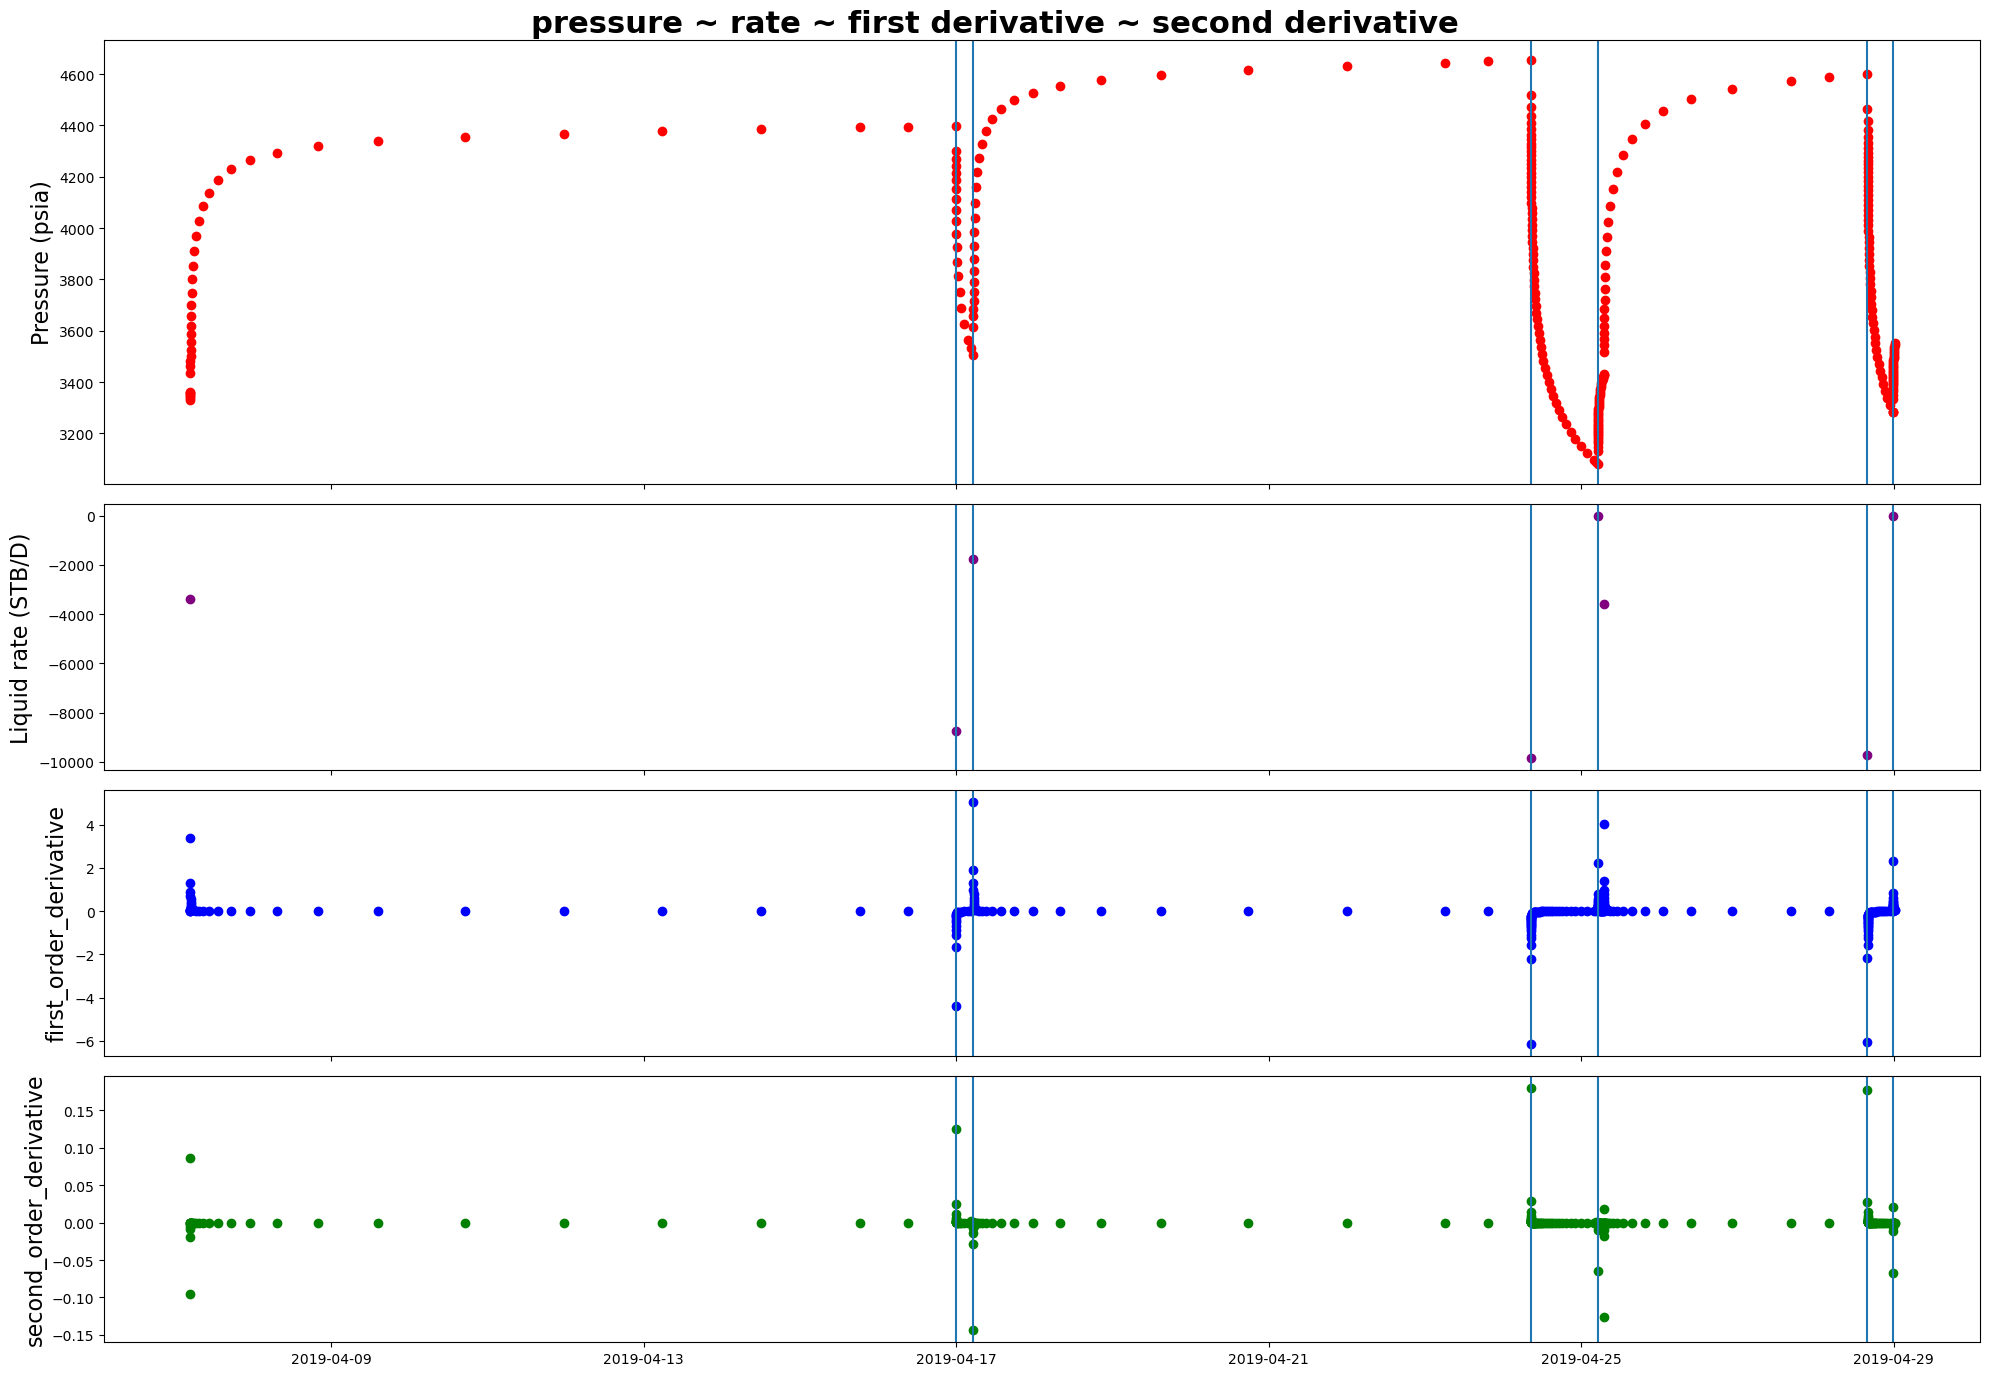

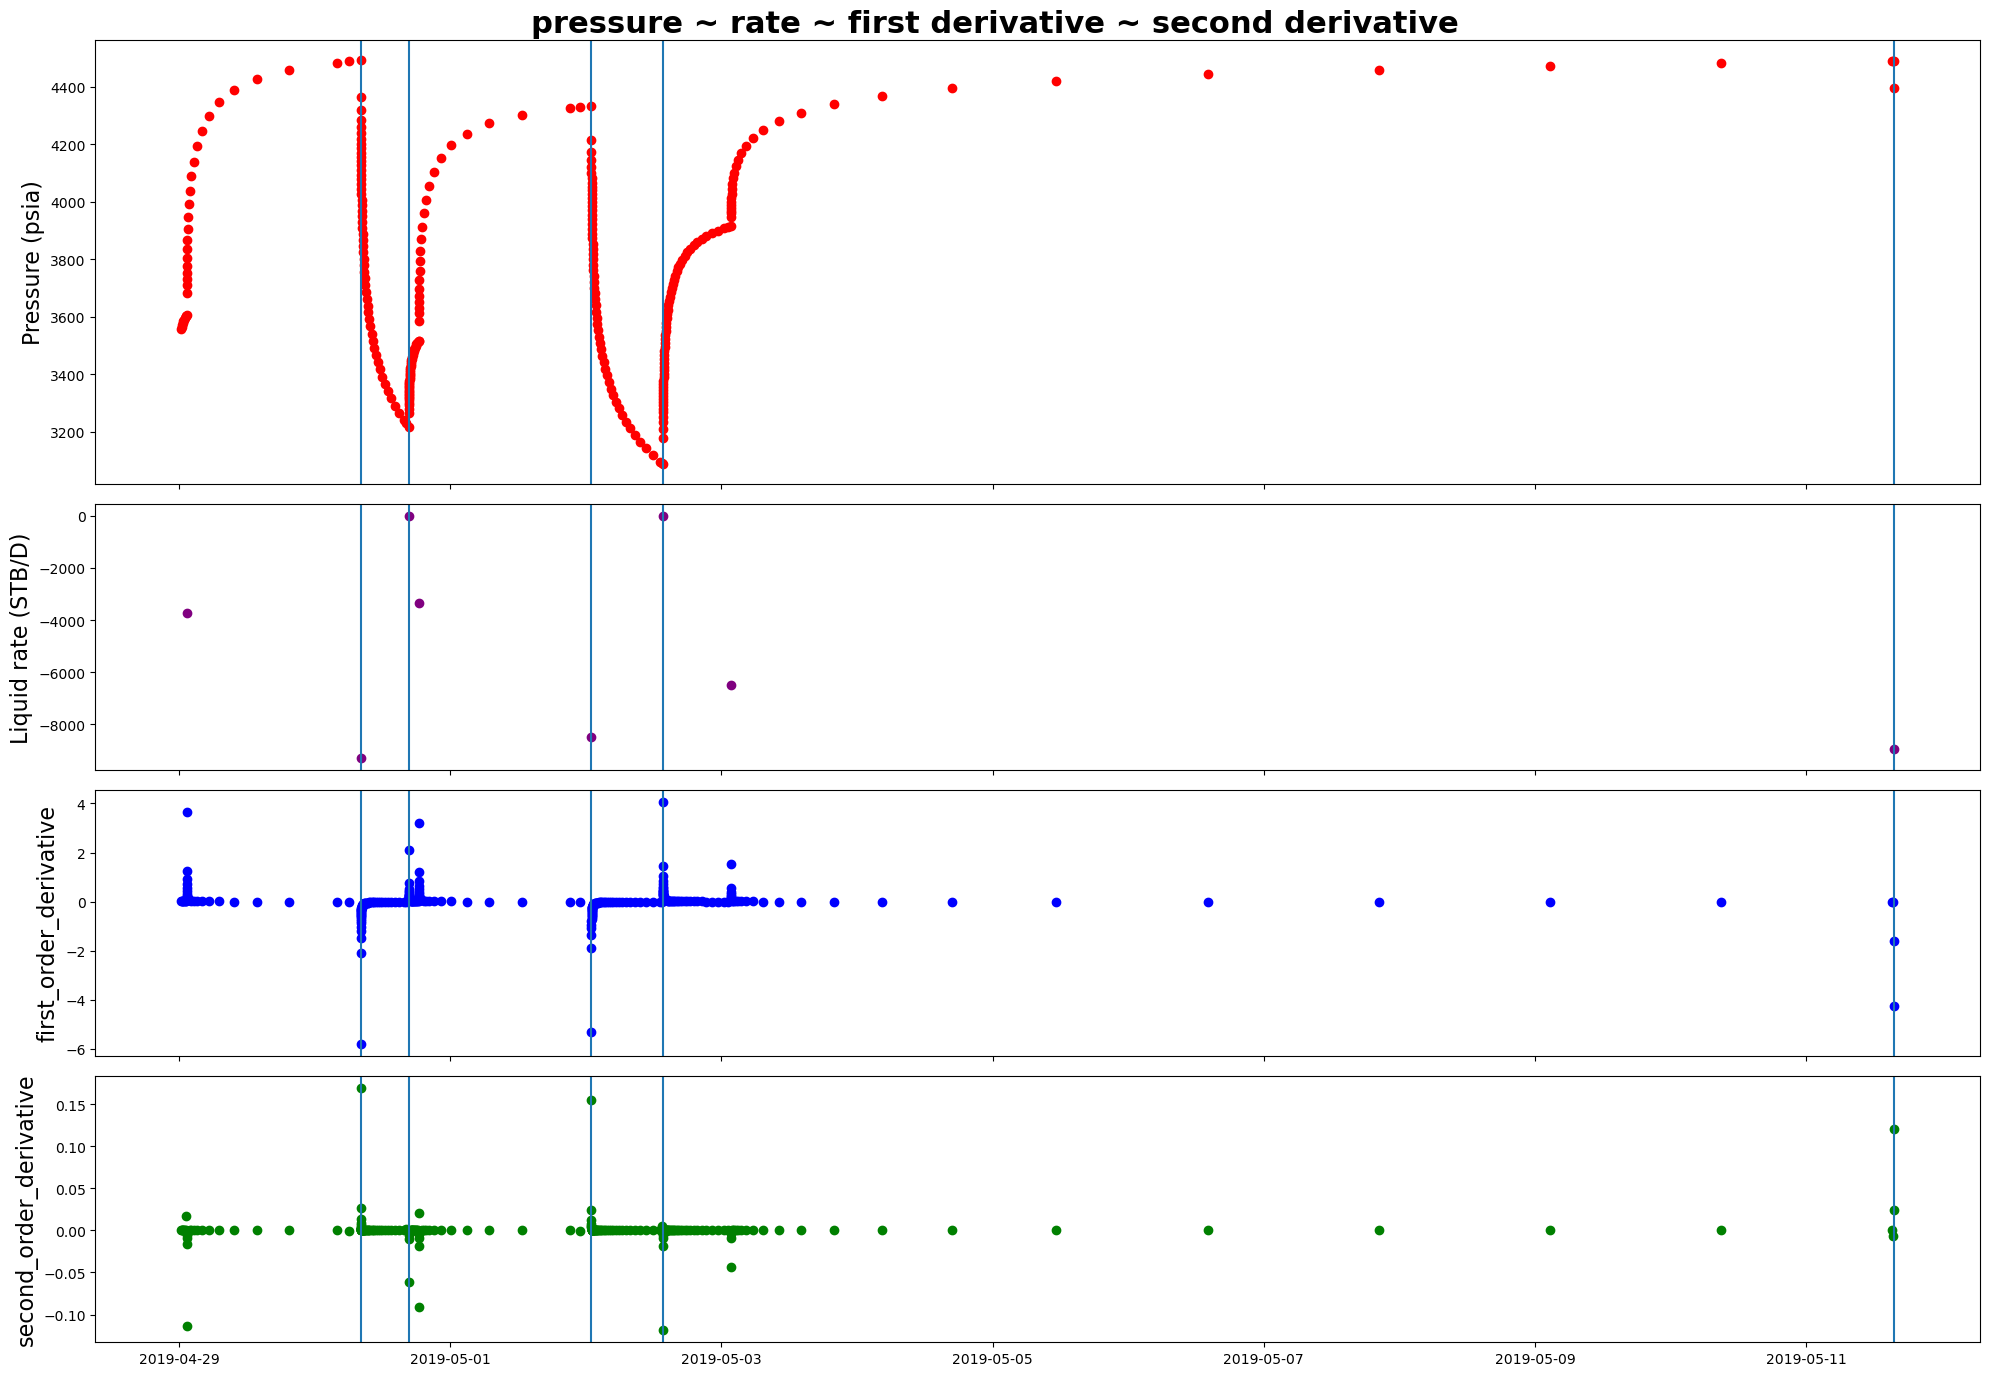

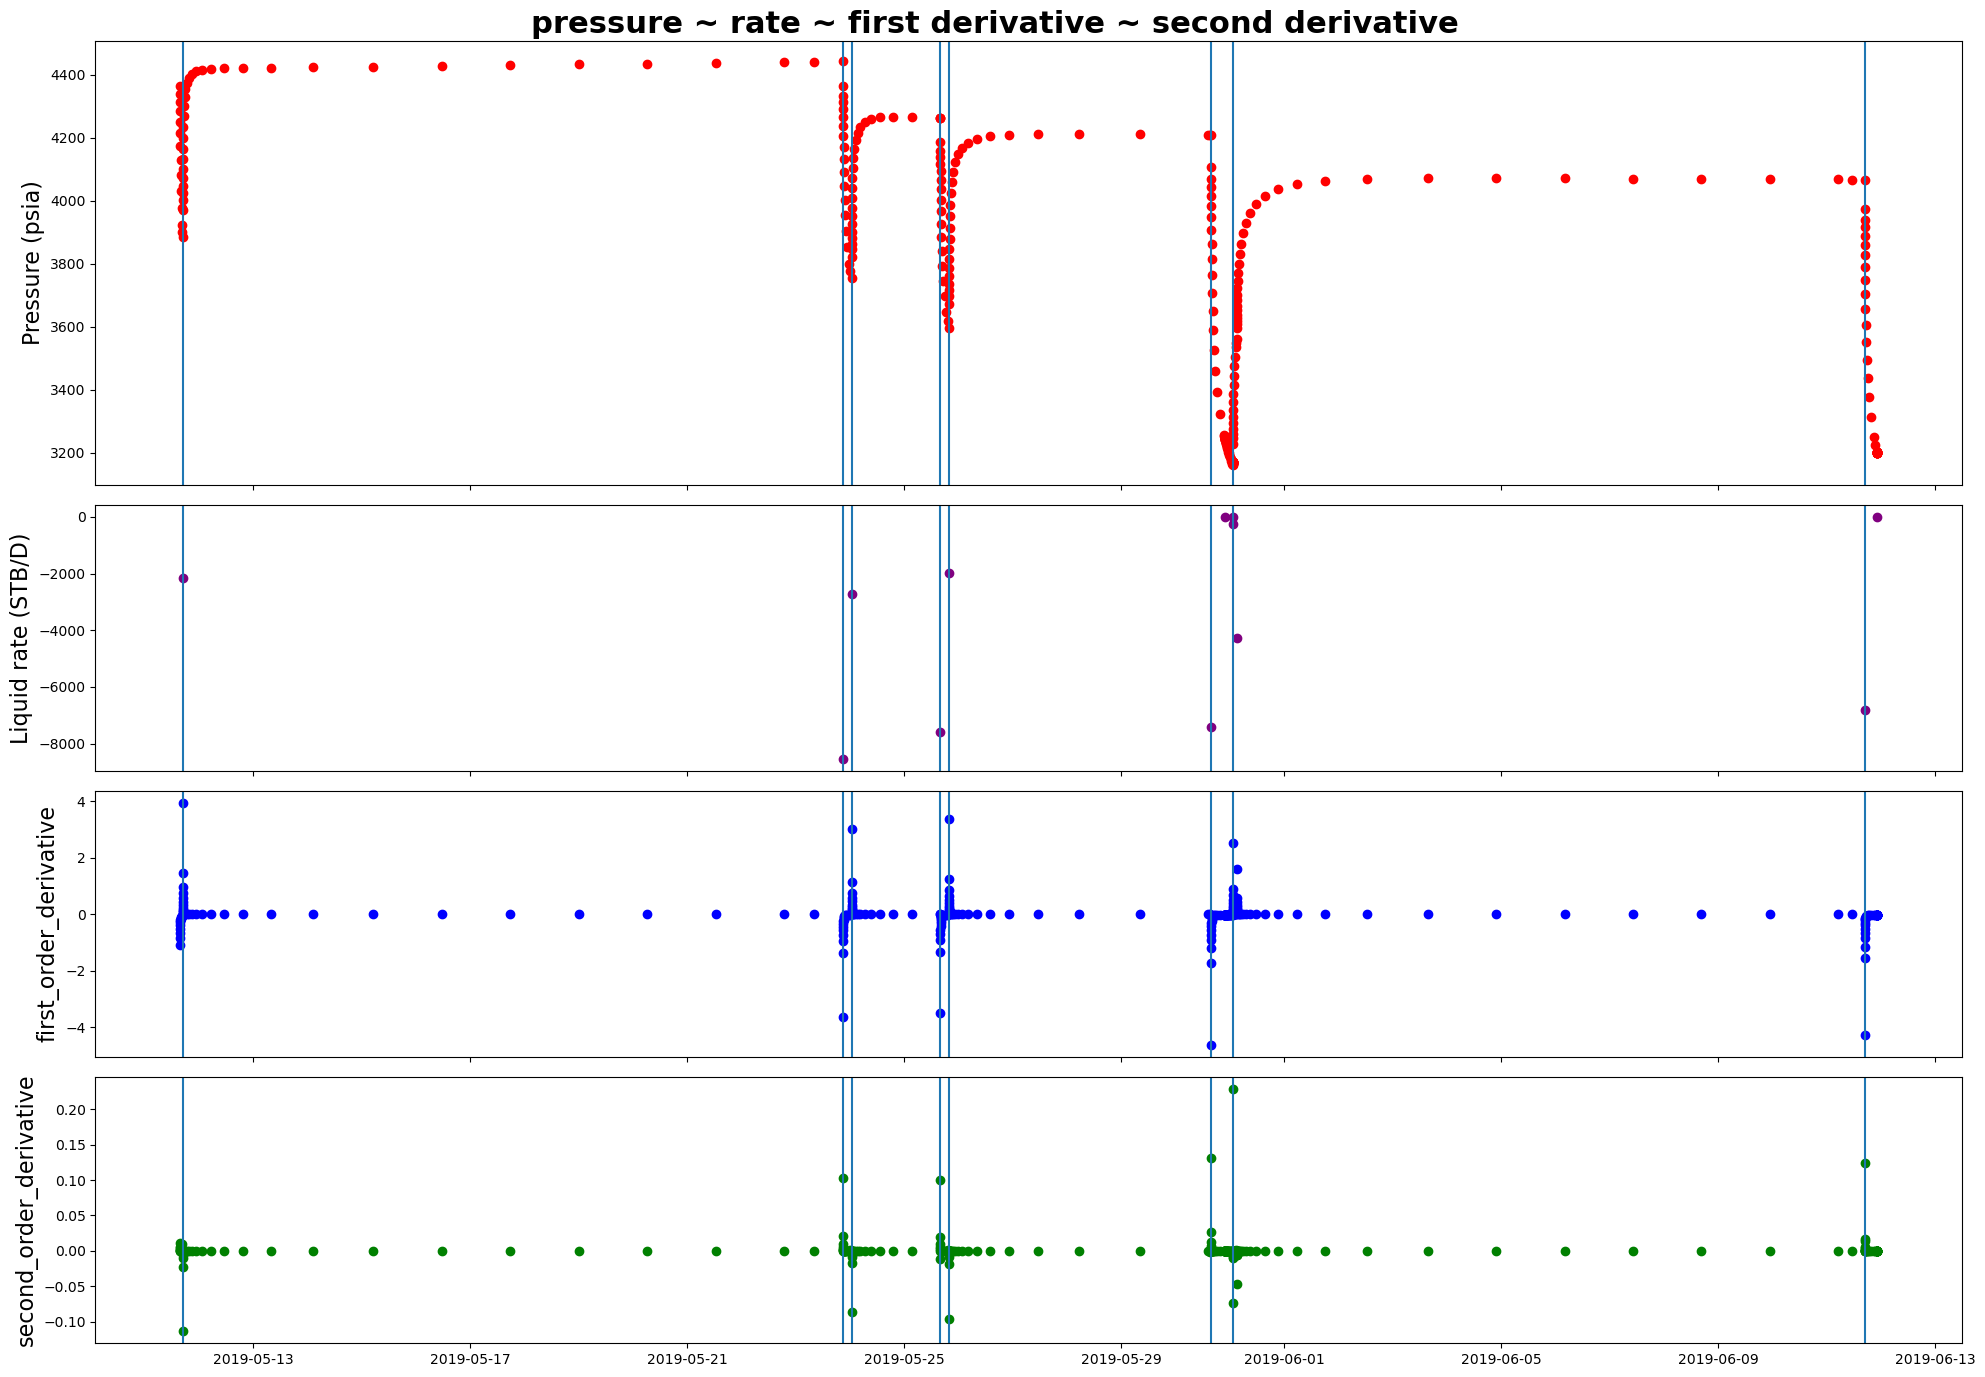

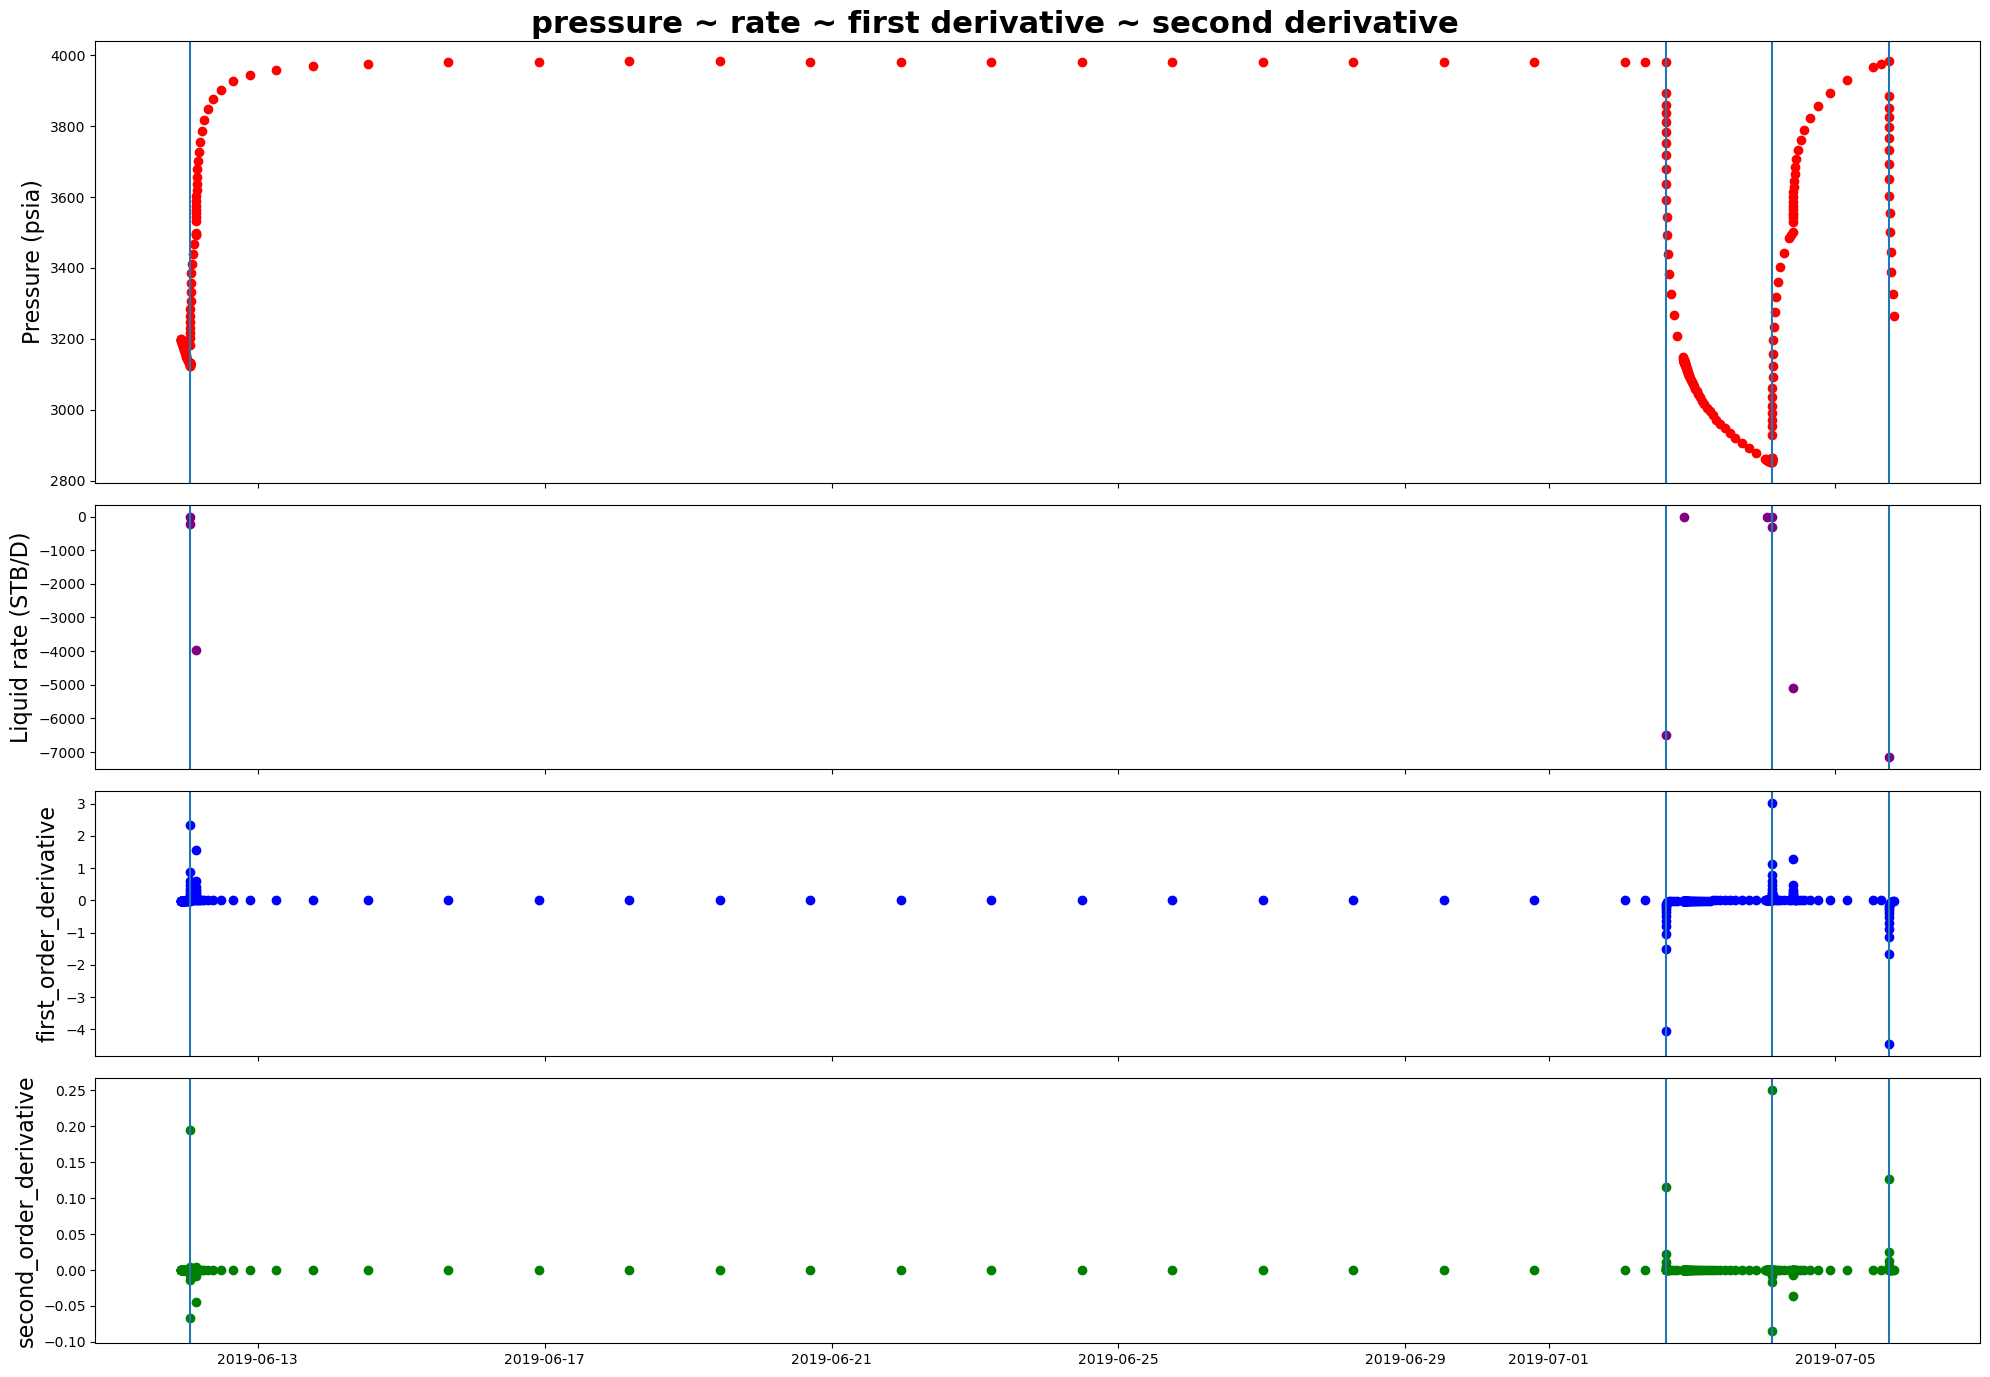

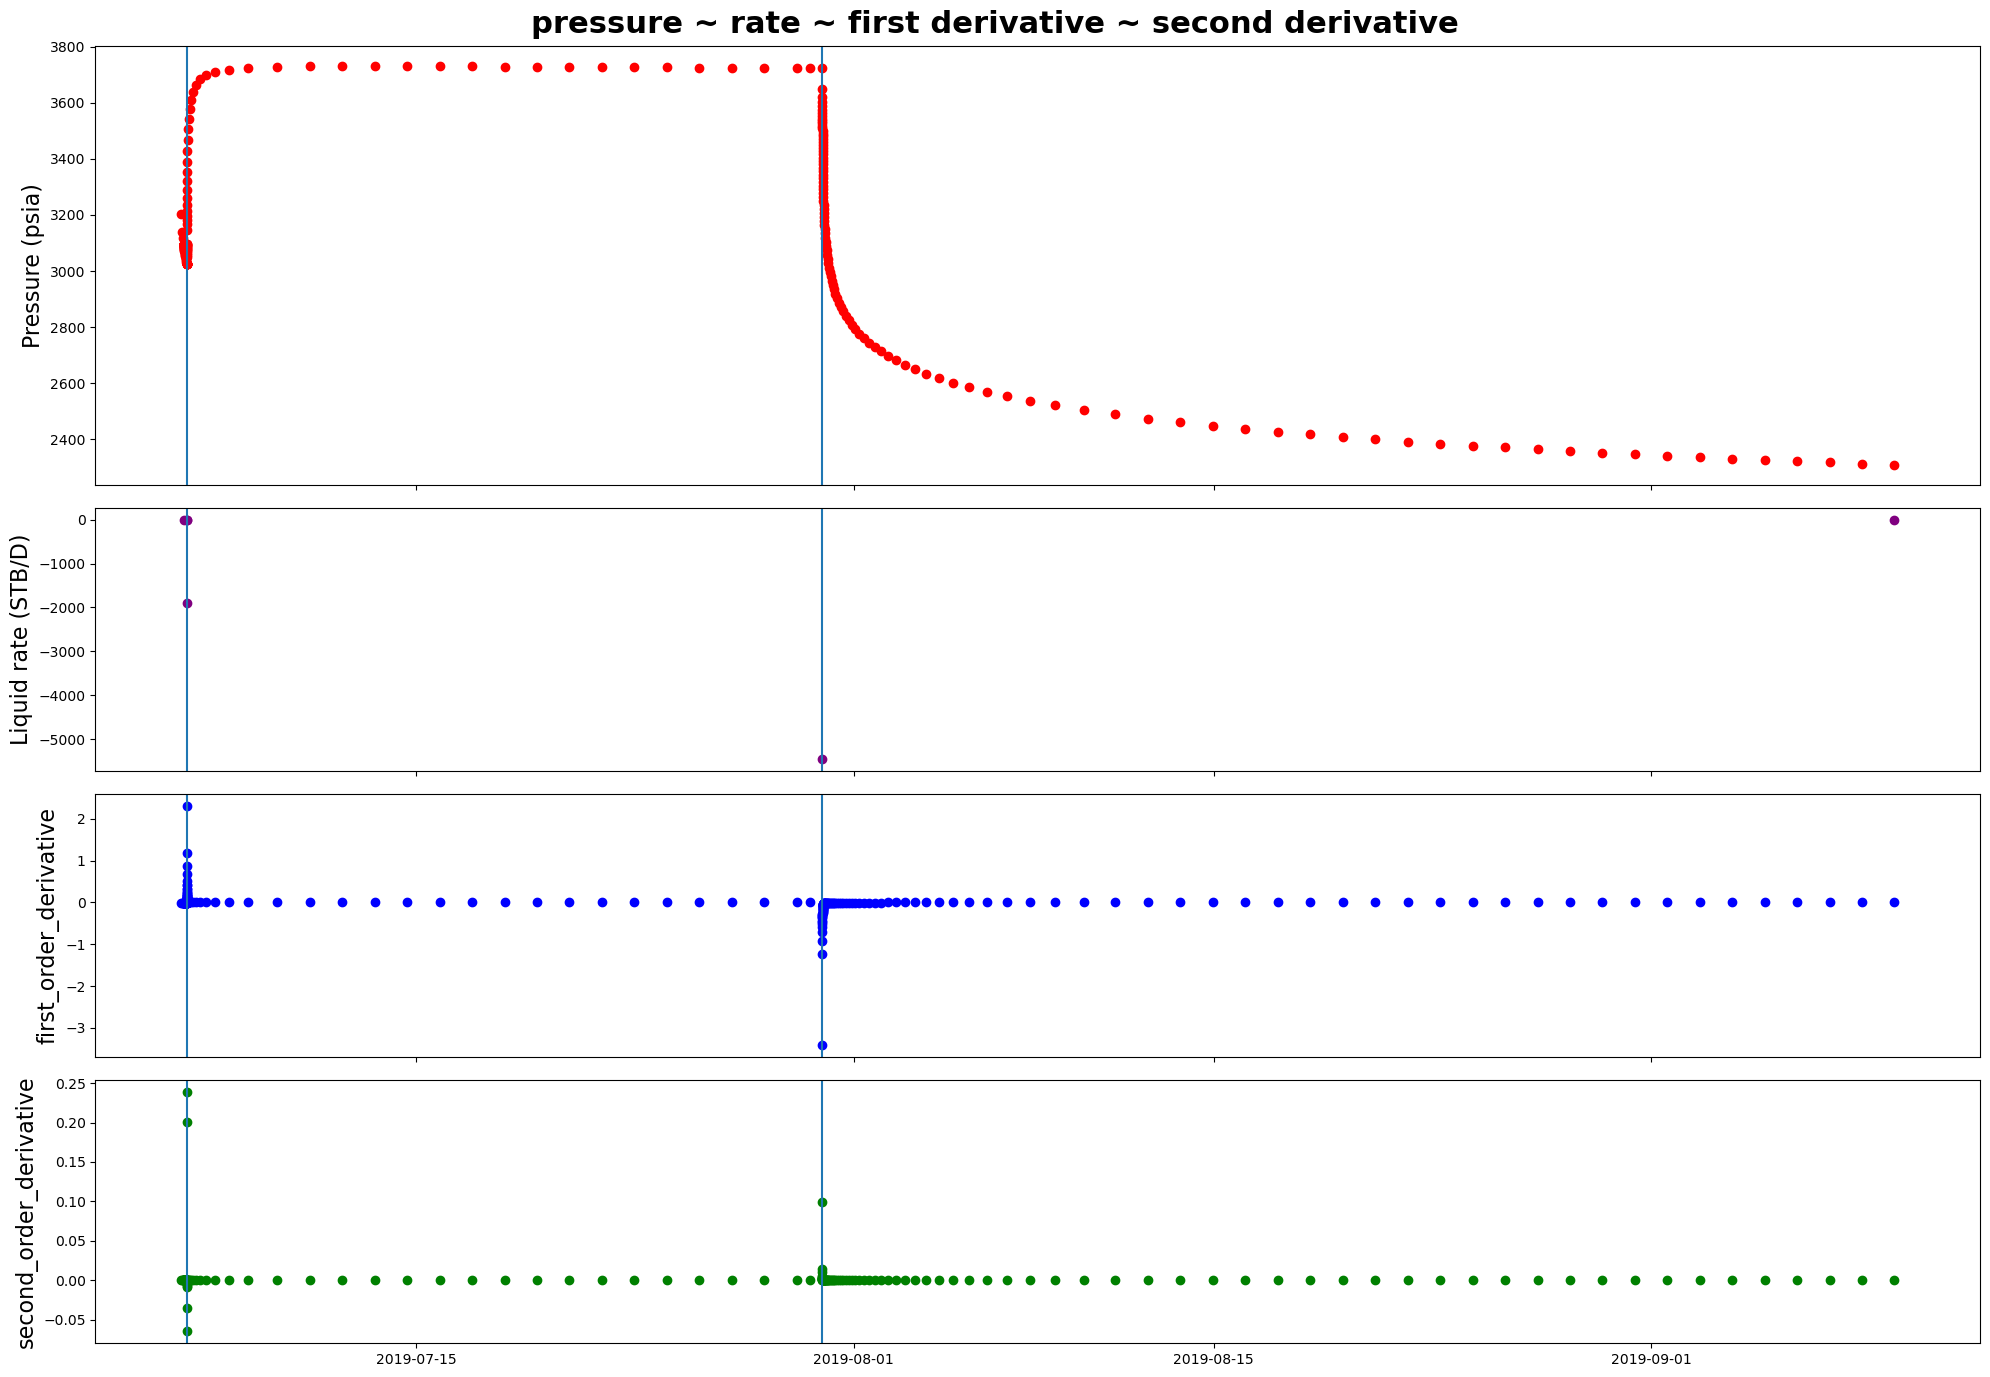

In [37]:
N=300
size=len(pressure_vs_time)
sublists_df = [pressure_vs_time.iloc[x:x+N,:] for x in range(0, len(pressure_vs_time), N)]
vline=group_index(breakpoints, 0, size, N)
print(vline)
print(len(vline))
count_breakpoints=0

for sub_pressure_vs_time,vline_subplot in zip(sublists_df,vline):
    count_breakpoints+=len(vline_subplot)
    fig, axs = plt.subplots(nrows=4, sharex=True, dpi=100,figsize=(20,14), gridspec_kw={'height_ratios': [5, 3,3,3]})

    fig.suptitle('pressure ~ rate ~ first derivative ~ second derivative', 
              **{'family': 'Arial Black', 'size': 22, 'weight': 'bold'})
    
    #plot pressure and breakpoints
    axs[0].scatter(x=sub_pressure_vs_time['Date'],y=sub_pressure_vs_time['Pressure (psia)'],color='red') 
    axs[0].set_ylabel('Pressure (psia)',fontsize=16)
    for breakpoint_index in vline_subplot:
            axs[0].axvline(x=pressure_vs_time["Date"][breakpoint_index])
    
            
    #plot rate and breakpoints       
    start_time=sub_pressure_vs_time.iloc[0]["Date"]
    end_time=sub_pressure_vs_time.iloc[-1]["Date"]
    sub_rate_vs_time=rate_vs_time.loc[(rate_vs_time['Time@end'] >= start_time) & (rate_vs_time['Time@end'] <= end_time)]
    
    axs[1].scatter(x=sub_rate_vs_time['Time@end'],y=sub_rate_vs_time['Liquid rate (STB/D)'],color='purple') 
    axs[1].set_ylabel('Liquid rate (STB/D)',fontsize=16)
    for breakpoint_index in vline_subplot:
            axs[1].axvline(x=pressure_vs_time["Date"][breakpoint_index])
            
    #plot first derivative and breakpoints
    axs[2].scatter(x=sub_pressure_vs_time['Date'],y=sub_pressure_vs_time['first_order_derivative'],color='blue') 
    axs[2].set_ylabel('first_order_derivative',fontsize=16)
    for breakpoint_index in vline_subplot:
            axs[2].axvline(x=pressure_vs_time["Date"][breakpoint_index])
            
    #plot second derivative and breakpoints
    axs[3].scatter(x=sub_pressure_vs_time['Date'],y=sub_pressure_vs_time['second_order_derivative'],color='green') 
    axs[3].set_ylabel('second_order_derivative',fontsize=16)
    for breakpoint_index in vline_subplot:
            axs[3].axvline(x=pressure_vs_time["Date"][breakpoint_index])
print("breakpoints:",count_breakpoints)

In [33]:
def plot_pressure_transients(N,pressure_vs_time,breakpoints,figsize):
    rcParams.update({'figure.autolayout': True})
#     plt.figure(figsize=(14,9), dpi=600)

    timeP = pressure_vs_time["Date"]
    pressure = pressure_vs_time["Pressure (psia)"]
    

    size=len(timeP)

    vline=group_index(breakpoints, 0, size, N)

    sublists_timeP = [timeP[x:x+N] for x in range(0, len(timeP), N)]
    sublists_pressure = [pressure[x:x+N] for x in range(0, len(pressure), N)]

    fig, axs = plt.subplots(nrows=size//N+1, sharey=True, figsize=(20,80), dpi=50)
  
    fig.suptitle('Graph', 
              **{'family': 'Arial Black', 'size': 22, 'weight': 'bold'})

    plot_count=1
    breakpoints_counts=0
    for ax, x_timeP, y_pressure,vline_subplot in zip(axs, sublists_timeP, sublists_pressure,vline):
        ax.scatter(x_timeP,y_pressure)
        breakpoints_counts+=len(vline_subplot)
        for breakpoint_index in vline_subplot:
            ax.axvline(x=pressure_vs_time["Date"][breakpoint_index])

        plot_count+=1
    print("breakpoints_counts",breakpoints_counts)
    plt.savefig('1.png')
    plt.show()

[107, 164, 243, 328, 375, 446, 504, 523, 546, 568, 592, 611, 644, 713, 771, 820, 887, 953, 1036, 1101, 1179, 1254, 1319, 1396, 1456, 1513, 1598, 1648, 1719, 1784, 1875, 1938, 2017, 2073, 2137, 2156, 2185, 2247, 2315, 2369, 2433, 2487, 2552, 2610, 2698, 2713, 2746, 2764, 2789, 2807, 2835, 2916, 2965, 3044, 3101, 3240, 3284, 3355, 3411]
59
breakpoints_counts 59


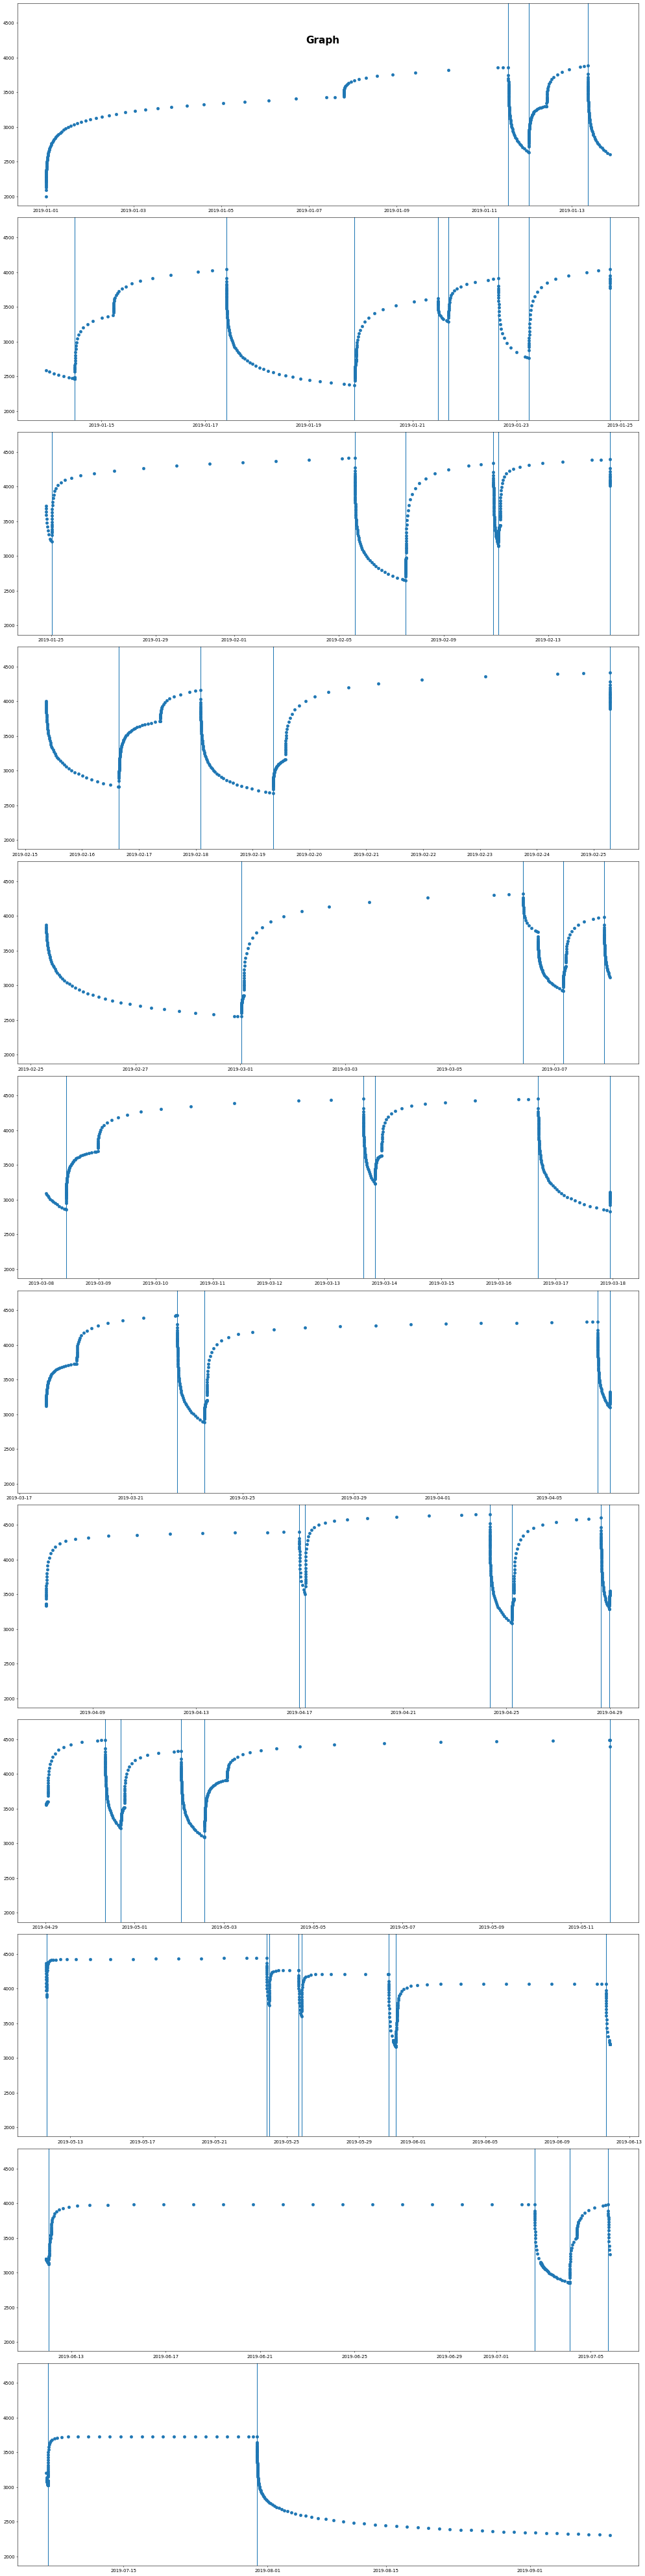

In [34]:
print(breakpoints)
print(len(breakpoints))
figsize=(20,60)
N=300
plot_pressure_transients(N,pressure_vs_time,breakpoints,figsize)